# Can We Identify Patients at High Risk of Heart Failure with Machine Learning?

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.  

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.  
  
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.  
  
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.  


### Acknowledgements  
  
#### Citation  
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)  
  
  https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec6

#### License  
CC BY 4.0

# 1. Import Libraries<a id='1_Import_Libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from pandas_profiling import ProfileReport
from sklearn import linear_model, preprocessing, tree, metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from io import StringIO  
from IPython.display import Image  
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 2. Import Dataset and Inspect Data<a id='2_Import_Dataset'></a>

### a. Read file and print a sample of 10 entries<a id='a_Read_file'></a>

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.sample(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
8    65.0        0                       157         0                 65   
225  75.0        0                       675         1                 60   
7    60.0        1                       315         1                 60   
94   58.0        0                       144         1                 38   
189  40.0        0                       244         0                 45   
110  85.0        0                       129         0                 60   
232  40.0        1                       129         0                 35   
284  50.0        1                        54         0                 40   
59   72.0        0                       364         1                 20   
27   70.0        0                       122         1                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
8                      0  263358.03               1.5           138    0   
225                    0  265000.00               1.4           125    0   
7                      0  454000.00               1.1           131    1   
94                     1  327000.00               0.7           142    0   
189                    1  275000.00               0.9           140    0   
110                    0  306000.00               1.2           132    1   
232                    0  255000.00               0.9           137    1   
284                    0  279000.00               0.8           141    1   
59                     1  254000.00               1.3           136    1   
27                     1  284000.00               1.3           136    1   

     smoking  time  DEATH_EVENT  
8          0    10            1  
225        0   205            0  
7          1    10            1  
94         0    83            0  
189        0   174            0  
110        1    90            1  
232        0   209            0  
284        0   250            0  
59         1    59            1  
27         1    26            1

### b. Print the shape of the file so we know the number of columns and entries  

There are 299 entries across 13 columns.

In [3]:
heart_data.shape

(299, 13)

### c. Investigate the types of data that we have.  
We can see that all of our data is of a numeric type, even categories like sex, or high blood pressure.  
This also gives us a chance to look at the column names.


In [4]:
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### d. Describe all columns  

Here we can get a look at the type of data we are dealing with.  
Some of the columns such as Sex are Boolean, having simply a 1 or 0 to denote the sex of the subject.

In [5]:
heart_data.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

### e. Boolean categorical variables  
Our Binary Variables are as follows:  
Sex - 1 = Male, 0 = Female  
  
1 = Yes, 0 = No, for the following: Anaemia, Diabetes, High Blood Pressure, Smoking, Death Event. 

### e. Check for missing values  

Our data table is complete with no missing values.

In [6]:
missing = pd.concat([heart_data.isnull().sum(), 100 * heart_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count')

Count    %
age                           0  0.0
anaemia                       0  0.0
creatinine_phosphokinase      0  0.0
diabetes                      0  0.0
ejection_fraction             0  0.0
high_blood_pressure           0  0.0
platelets                     0  0.0
serum_creatinine              0  0.0
serum_sodium                  0  0.0
sex                           0  0.0
smoking                       0  0.0
time                          0  0.0
DEATH_EVENT                   0  0.0

# 3. Exploratory Data Analysis

### a. Investigate the distributions of feature values   
Here we can get an idea of how are values are distributed, easily seperating the binary values form those with a range, and evaluating the distribution of the binary values. For instance we have less subjects that are anemic then those who are not.


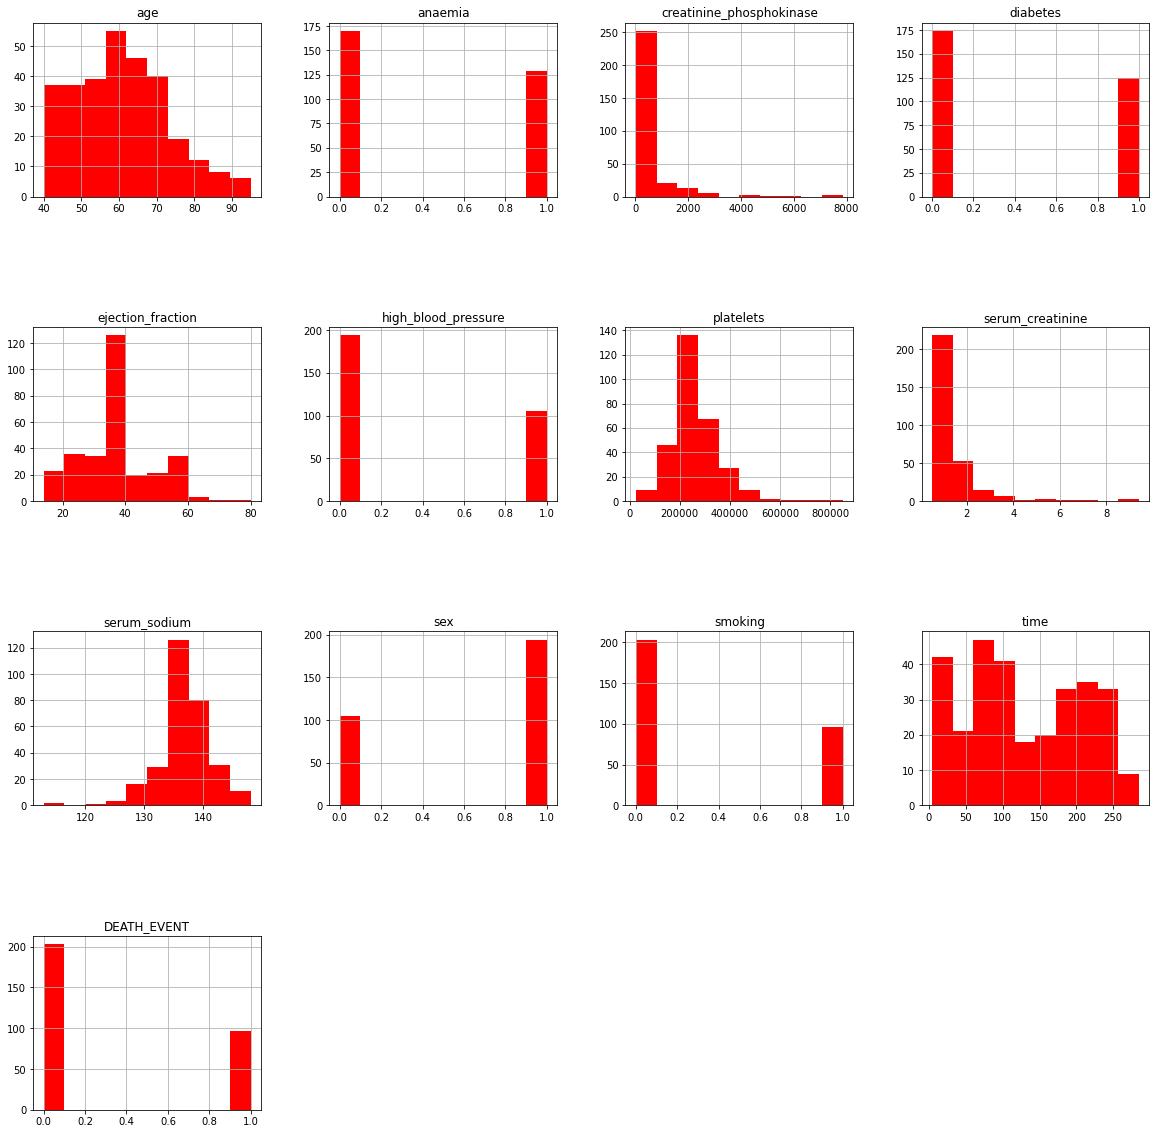

In [7]:
heart_data.hist(figsize=(20,20), color='r')
plt.subplots_adjust(hspace=.75);

### b. Distribution of Death Event by Age

Of our 299 subjects 96 suffered a death event. We show the distribution of the subjects ages at death. As compared to the overall distribution of age amoung the subjects.   
  
The two histograms are basically the same shape, showing that age does not play a large roll in the cause of a death event. Looking more closely shows that the bars towrads the right of the death histogram are a bit taller than the ones in the age distribution, while the bars to the left are shorter. This indicates that older subjects die at a higher rate than the young subjects, but we don't have enough information to see a correlation betweed age and death event.

In [8]:
heart_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
death_age = pd.DataFrame(heart_data.loc[heart_data['DEATH_EVENT'] == 1, 'age'])

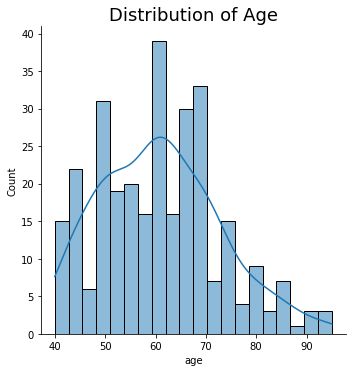

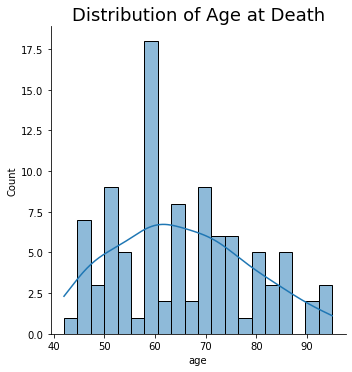

In [10]:
sns.displot(heart_data['age'], bins=20, kde=True)
plt.title('Distribution of Age', fontsize=18)
sns.displot(death_age['age'], bins=20, kde=True)
plt.title('Distribution of Age at Death', fontsize=18);

### c. Distribution of age by gender
  
You can see that the majority of the ages fall between 40 and 80.  
The largest distribution of males is just about 60, while the largest distribution of females is a bit higher.  
There is one outlier in the female age disribution.

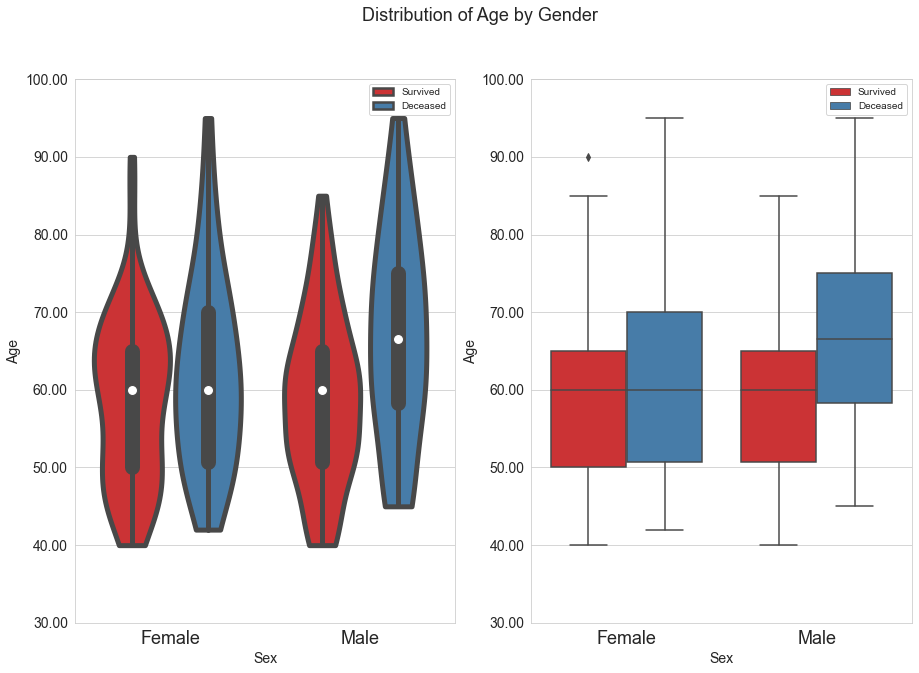

In [11]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Distribution of Age by Gender', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, data=heart_data, hue=hue, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, data=heart_data, hue=hue, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);


### d. Investigating correlation  
We're going to use the Seaborn Pairplot function to see if there are any strongly correlated variables.  
  
__-- As an example__

The graph below, taken from a study on college admissions shows a very strong correlation between GPA and the chance of admission.

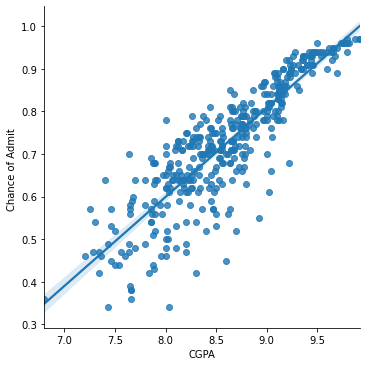

Looking at the charts below we don't see a strong correlation between any of the variables.  
The lighter colored data points mark the death events.  

#### -- i. Using Seaborn PairPlot

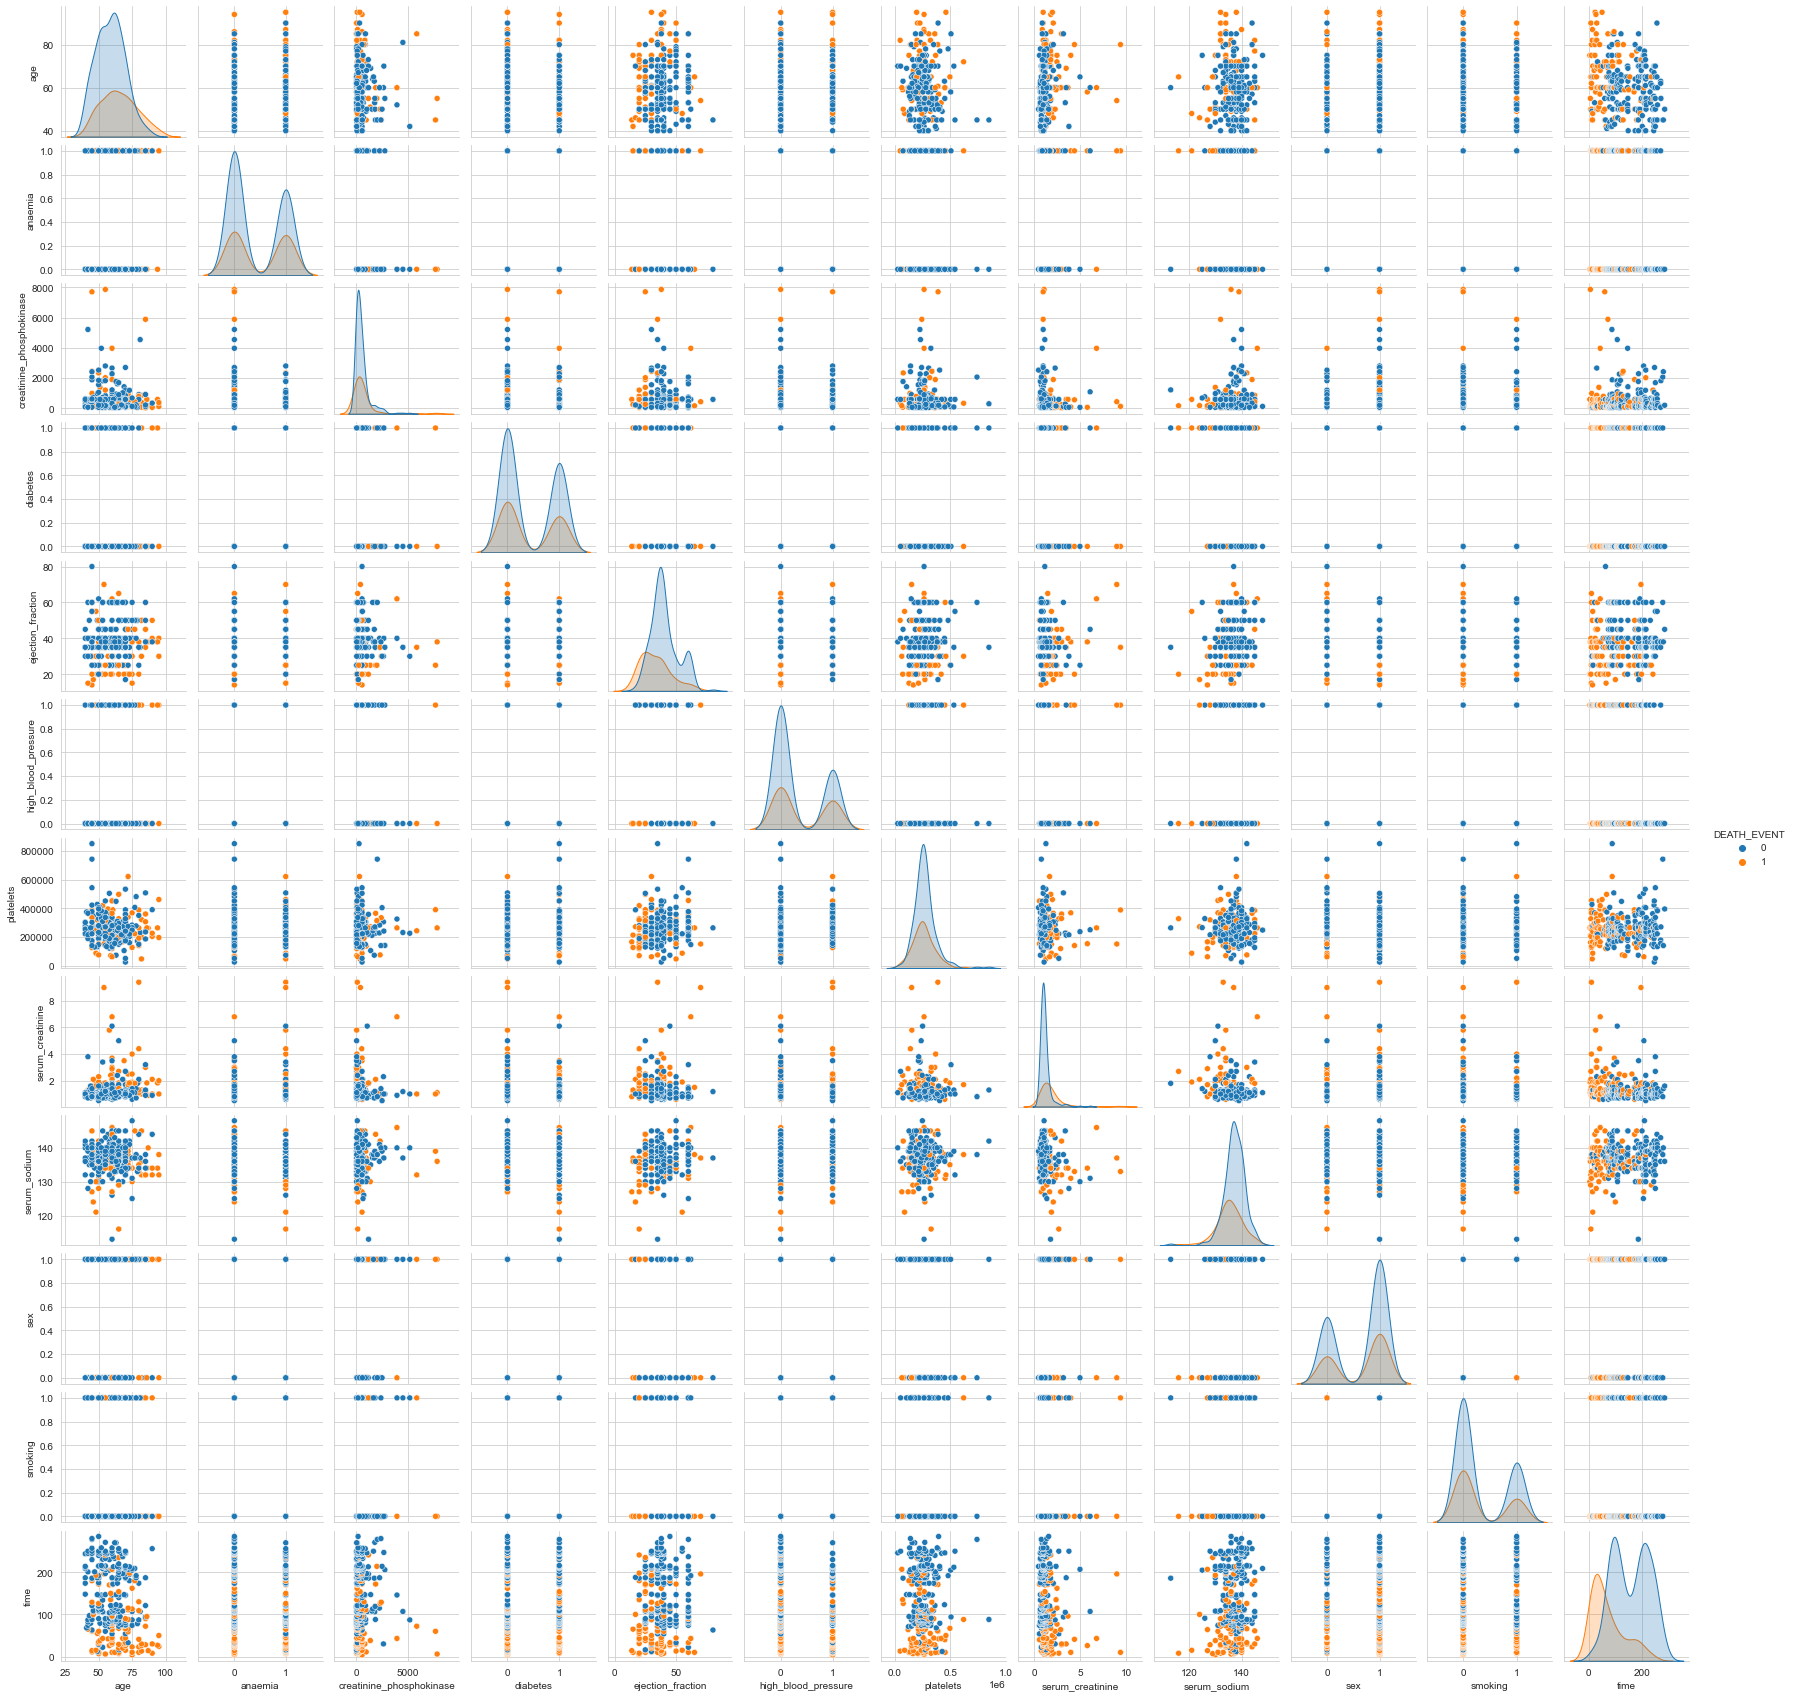

In [12]:
cols = heart_data.columns.tolist()
sns.pairplot(heart_data[cols], height=2.0, hue='DEATH_EVENT');

### e. Exploration of Covariance  

Our covariance matrix below reports a number from -1, meaning strong negative correlation, to 1, strong correlation, with 0 meaning no correlation.  

Looking at the Death Event row, we see the strongest correlation between Time and Death Event. We see notable correlation (above 0.05) between Death Event and: Serum Creatinine, Ejection Fraction, Serum Sodium, High Blood Pressure, and Creatine Phosphokinase. Age also seems to be a factor, but it's hard to tell if it contributes to death caused by heart failure or if it's deaths by natural causes.


#### -- i. Covariance Matrix

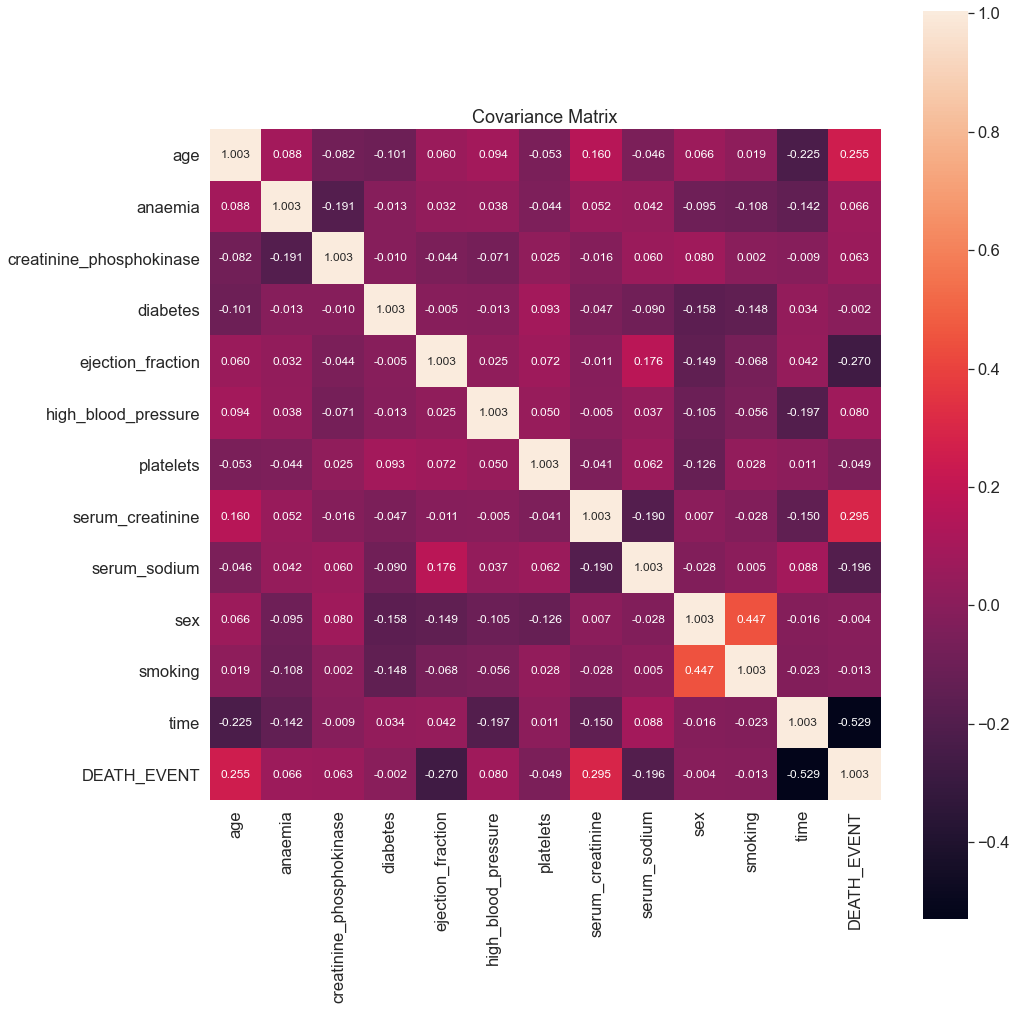

In [13]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(heart_data[cols].iloc[:, range(0,13)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### f. Investigating variable distributions  
  
Plots of the distributions of our fearures allows us to get an understanding of the data itself. The violin plots allow us to see how the data is dristributed and the box plots allow us to check for outliers.

#### -- i. Distribution of death event by age and gender  
  

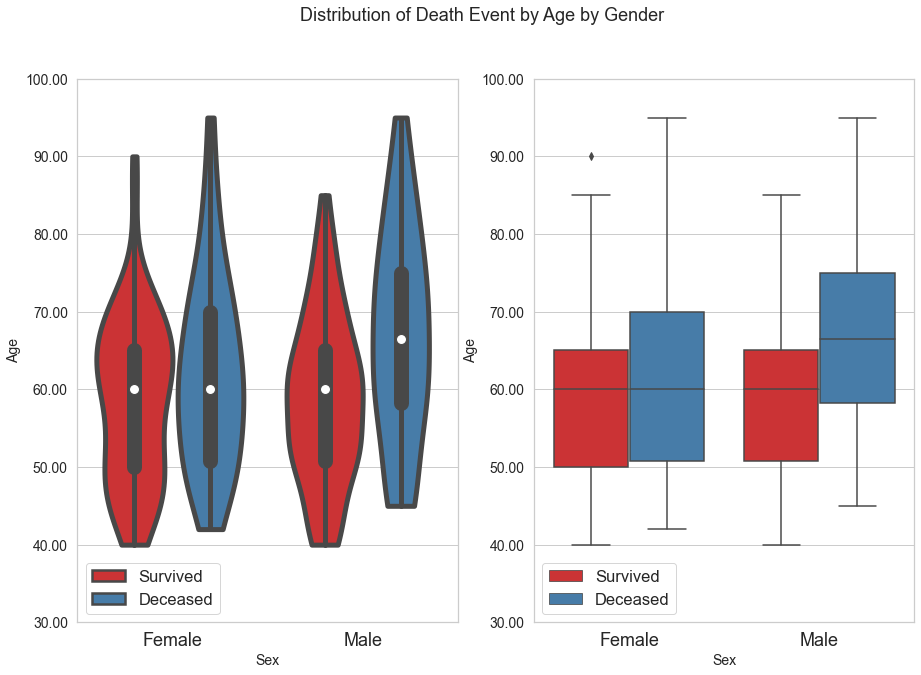

In [150]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Distribution of Death Event by Age by Gender', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])


b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- ii. Distribution of diabetes and death event by age
  

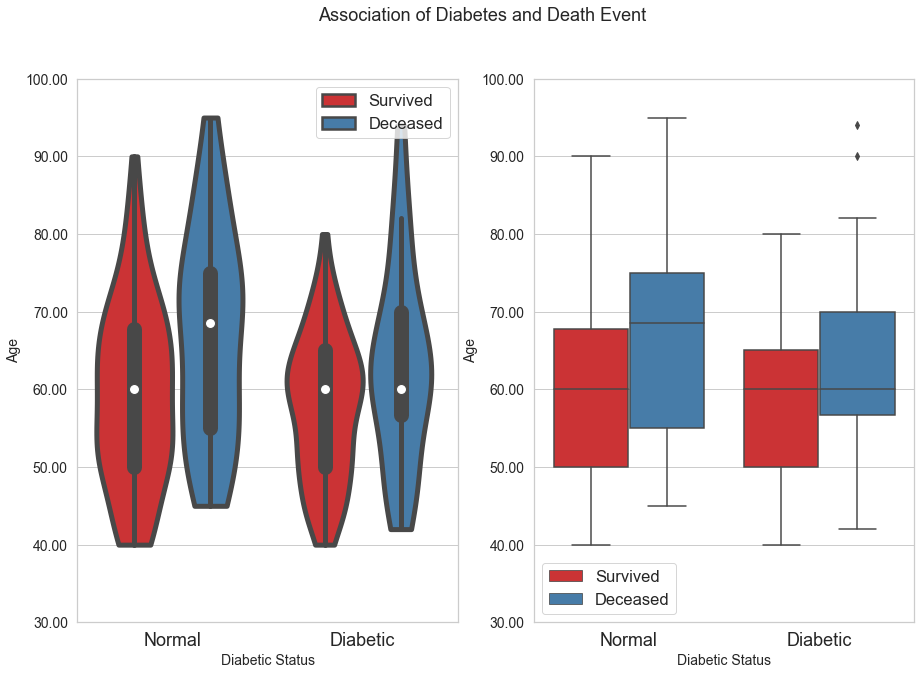

In [151]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Diabetes and Death Event', fontsize=18)
x='diabetes'
xlabel='Diabetic Status'
xticks=['Normal', 'Diabetic']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])


b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- iii. Distribution of smoking and death event by age

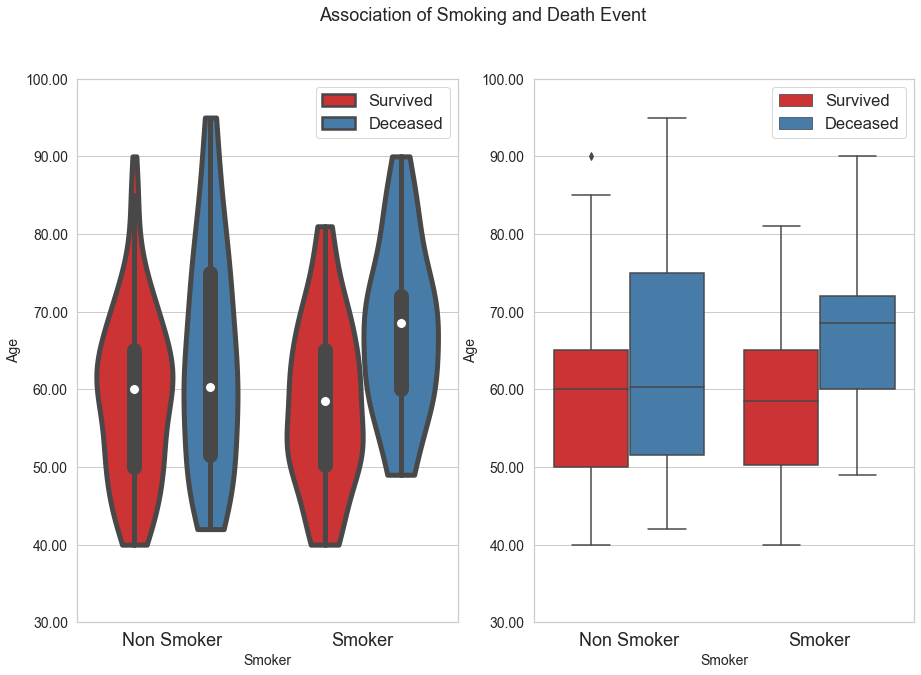

In [152]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Smoking and Death Event', fontsize=18)
x='smoking'
xlabel='Smoker'
xticks=['Non Smoker', 'Smoker']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])


b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- iv.  Distribution of serum creatinine and death event by gender  
The boxplot shows a high number of outliers, but because serum creatinine is such an important factor in heart health we are not going to make any adjustments to this data.

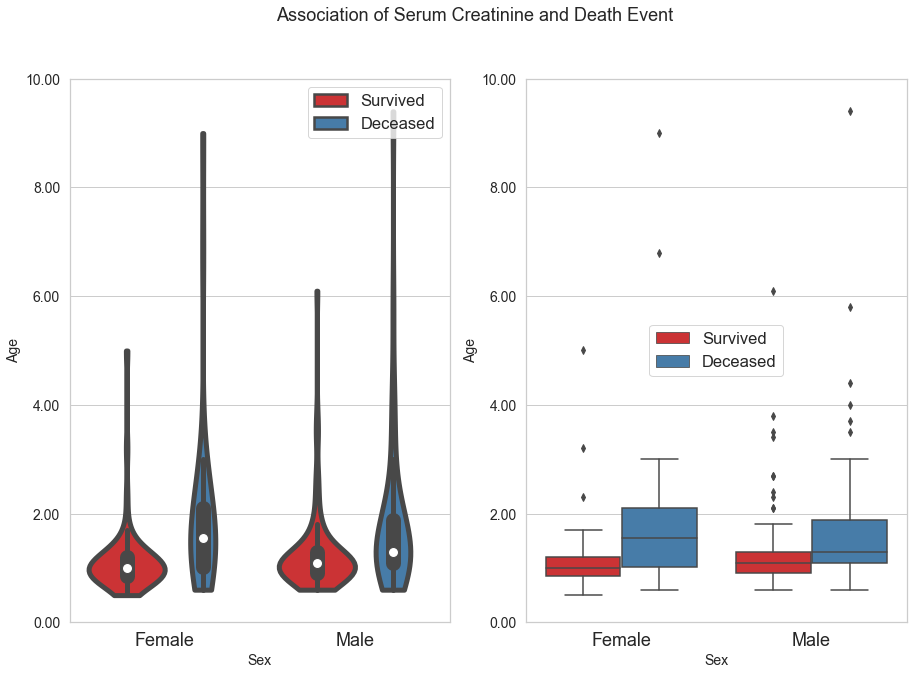

In [153]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Serum Creatinine and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='serum_creatinine'
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])


b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- v.  Distribution of high blood pressure by death event and age

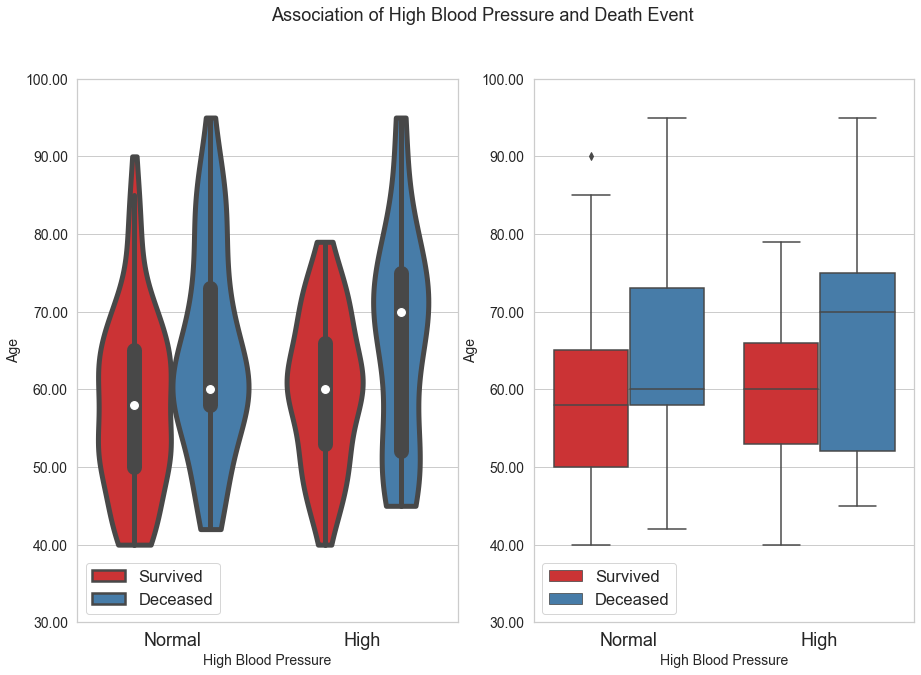

In [154]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of High Blood Pressure and Death Event', fontsize=18)
x='high_blood_pressure'
xlabel='High Blood Pressure'
xticks=['Normal', 'High']
y='age'
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])


b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased'])

#### -- vi. Distribution of serum sodium by death event and gender

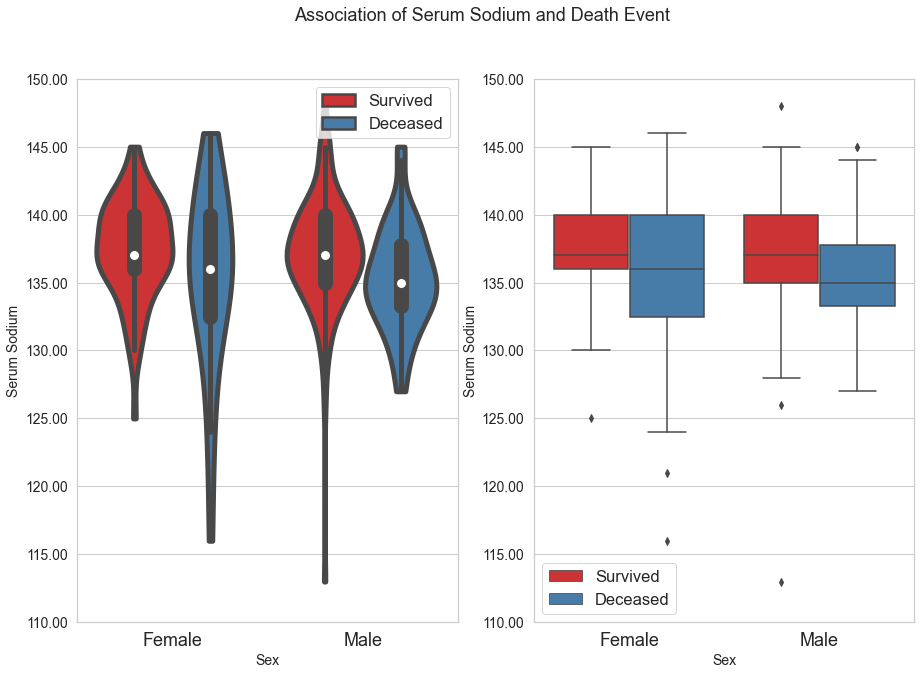

In [155]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Serum Sodium and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='serum_sodium'
ylabel='Serum Sodium'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- vii. Distribution of anaemia by death event and age

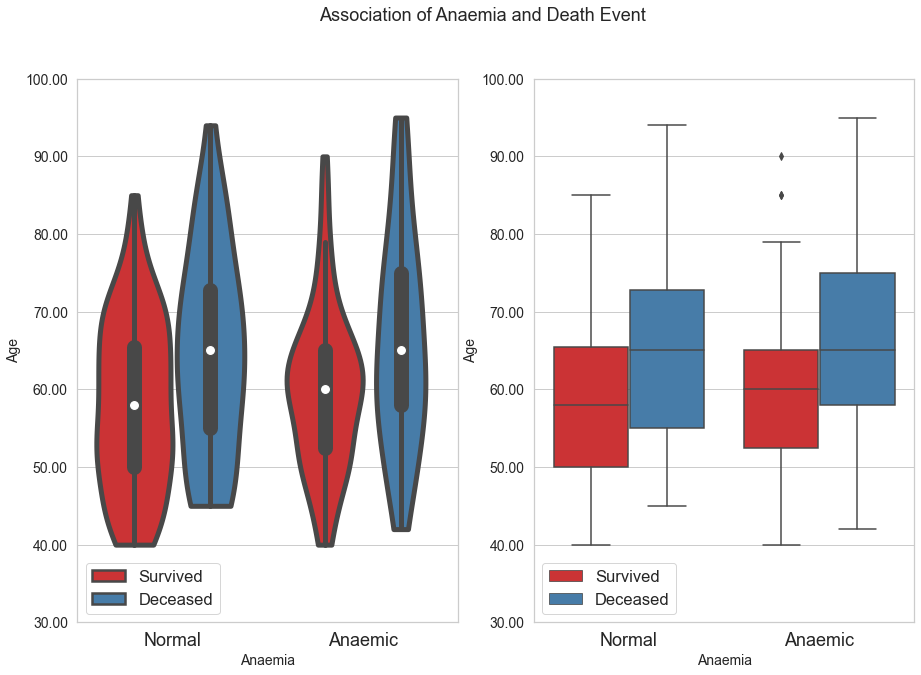

In [156]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Anaemia and Death Event', fontsize=18)
x='anaemia'
xlabel='Anaemia'
xticks=['Normal', 'Anaemic']
y='age'
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- viii. Distribution of creatinine phosphokinase by death event and gender

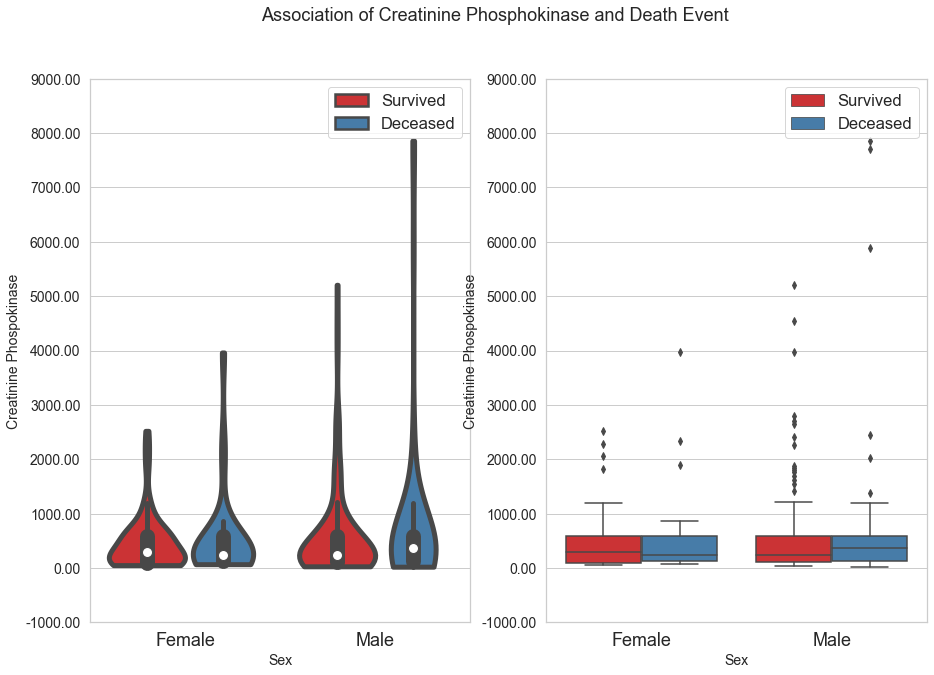

In [157]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Creatinine Phosphokinase and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='creatinine_phosphokinase'
ylabel='Creatinine Phospokinase'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased']);

#### -- ix. Distribution of ejection fraction and death event by gender

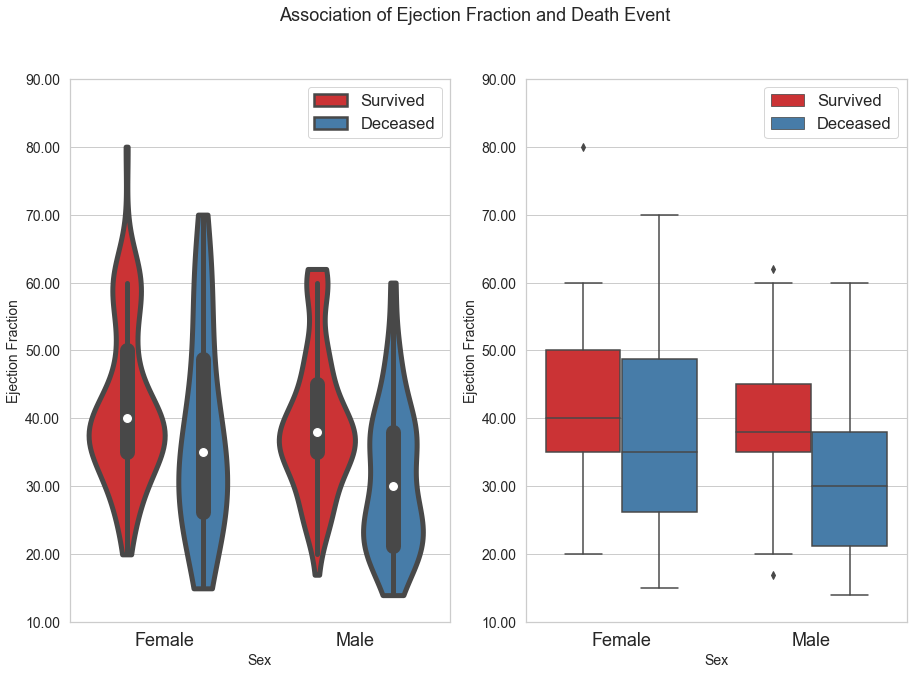

In [158]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Ejection Fraction and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='ejection_fraction'
ylabel='Ejection Fraction'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)
handles, _ = v.get_legend_handles_labels()
v.legend(handles, ['Survived', 'Deceased'])

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18)
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14)
handles, _ = b.get_legend_handles_labels()
b.legend(handles, ['Survived', 'Deceased'])

# 4. Exploration of ejection fraction  

Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.  

### a. What’s normal?
A normal heart’s ejection fraction may be between 50 and 70 percent.  
You can have a normal ejection fraction measurement and still have heart failure  
(called HFpEF or heart failure with preserved ejection fraction).  
  
If the heart muscle has become so thick and stiff that the ventricle holds a smaller than usual volume of blood, it might still seem to pump out a normal percentage of the blood that enters it. In reality, though, the total amount of blood pumped isn’t enough to meet your body’s needs.

### b. Correlation between serum sodium levels and ejection fraction  
Because ejection fraction is so important we decided to test the correlation between serum sodium levels and ejection fraction.    
A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

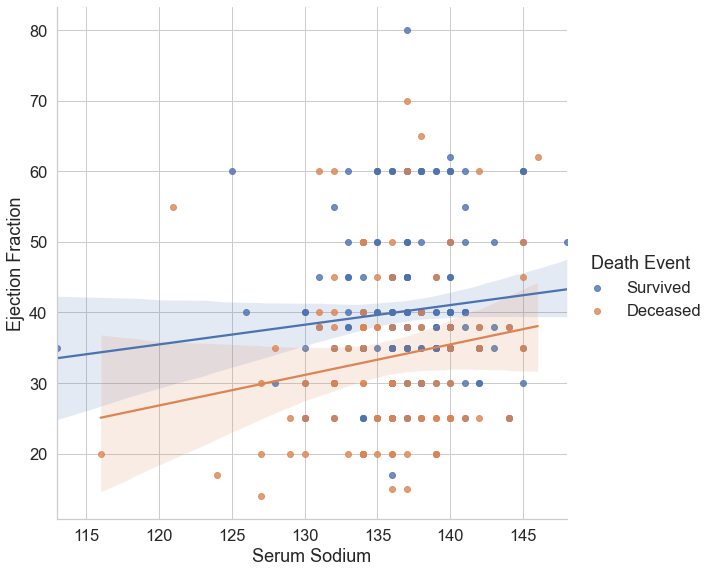

In [23]:
# Build plot
g = sns.lmplot(data=heart_data, x='serum_sodium', y='ejection_fraction', height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Serum Sodium', 'Ejection Fraction')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#### Correlation  
The correlation between serum sodium levels is clear, low serum sodium levels correlates with a low ejection fraction.  
The question is one of causation. Does low serum sodium __cause__ a low ejection fraction or is it vice versa?

### c. Correlation between serum sodium and death event

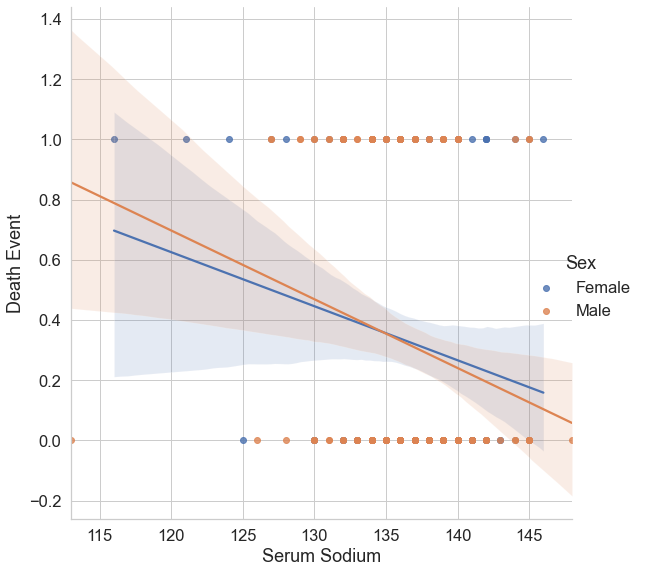

In [24]:
g = sns.lmplot(x='serum_sodium', y='DEATH_EVENT', hue='sex', data=heart_data, height=8, aspect=1);
g = g.set_axis_labels('Serum Sodium', 'Death Event')

# title
new_title = 'Sex'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### d. Correlation between ejection fraction and death event

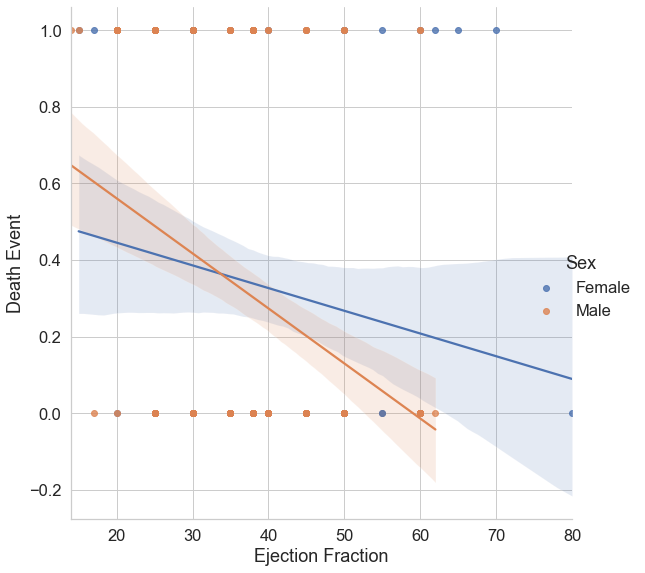

In [25]:
g = sns.lmplot(x='ejection_fraction', y='DEATH_EVENT', hue='sex', data=heart_data, height=8, aspect=1);
g = g.set_axis_labels('Ejection Fraction', 'Death Event')

# title
new_title = 'Sex'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### e. Correlation between serum creatinine and death event

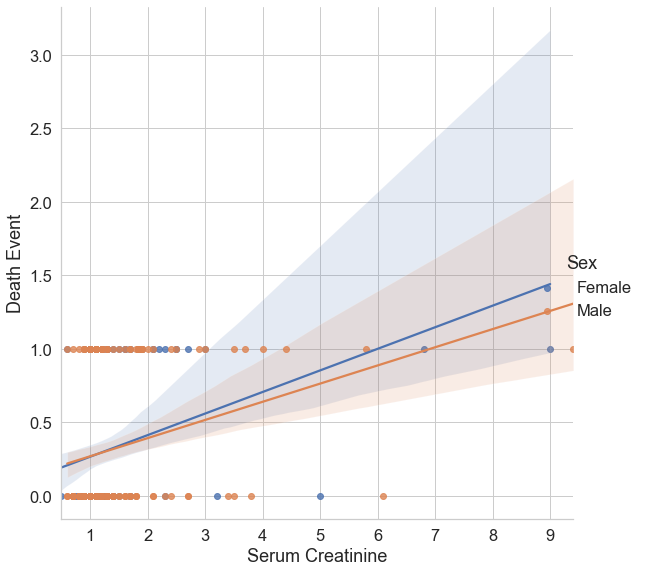

In [26]:
g = sns.lmplot(x='serum_creatinine', y='DEATH_EVENT', hue='sex', data=heart_data, height=8, aspect=1);
g = g.set_axis_labels('Serum Creatinine', 'Death Event')

# title
new_title = 'Sex'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### f. Correlation between ejection fraction and smoking

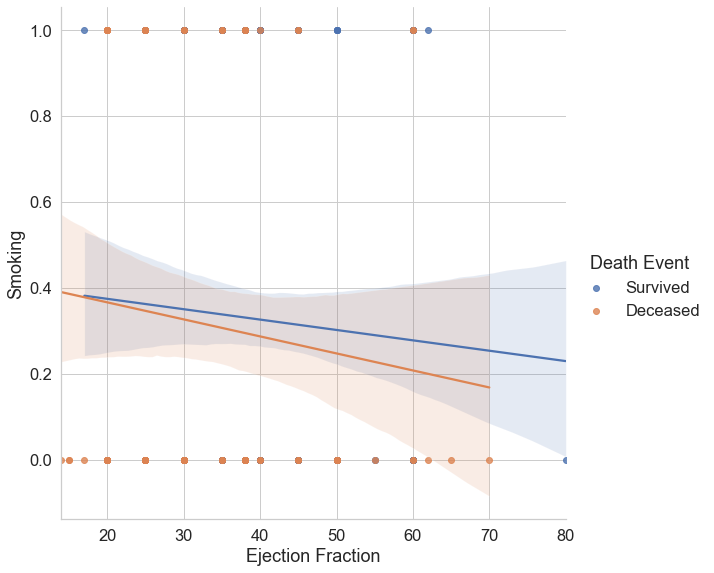

In [27]:
g = sns.lmplot(x='ejection_fraction', y='smoking', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Ejection Fraction', 'Smoking')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### g. Correlation between ejection fraction and platelets

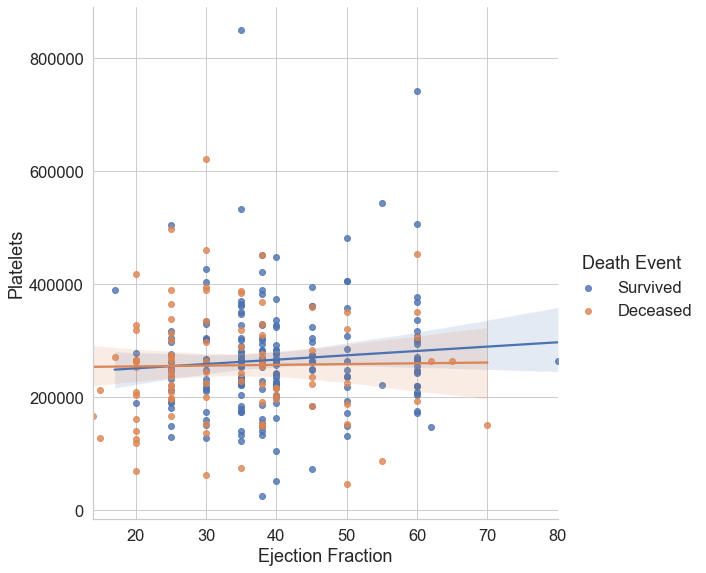

In [28]:
g = sns.lmplot(x='ejection_fraction', y='platelets', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Ejection Fraction', 'Platelets')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### h. Correlation between ejection fraction and creatinine phosphokinase

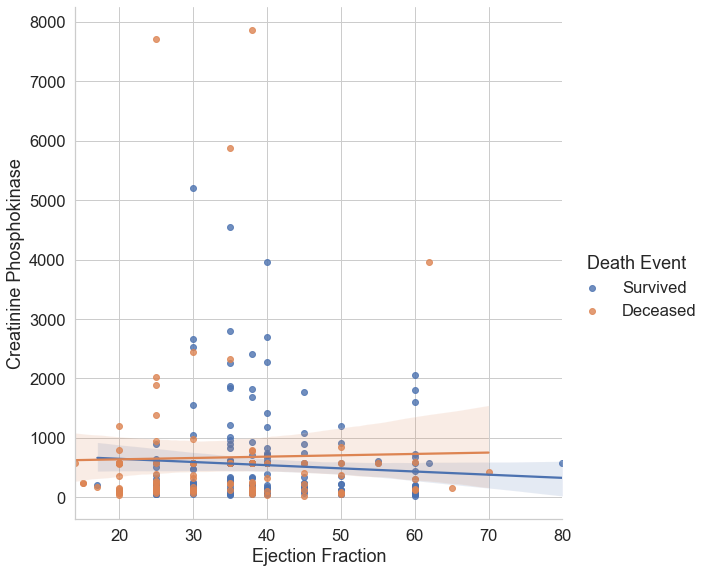

In [29]:
g = sns.lmplot(x='ejection_fraction', y='creatinine_phosphokinase', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Ejection Fraction', 'Creatinine Phosphokinase')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### i. Correlation between ejection fraction and serum creatinine

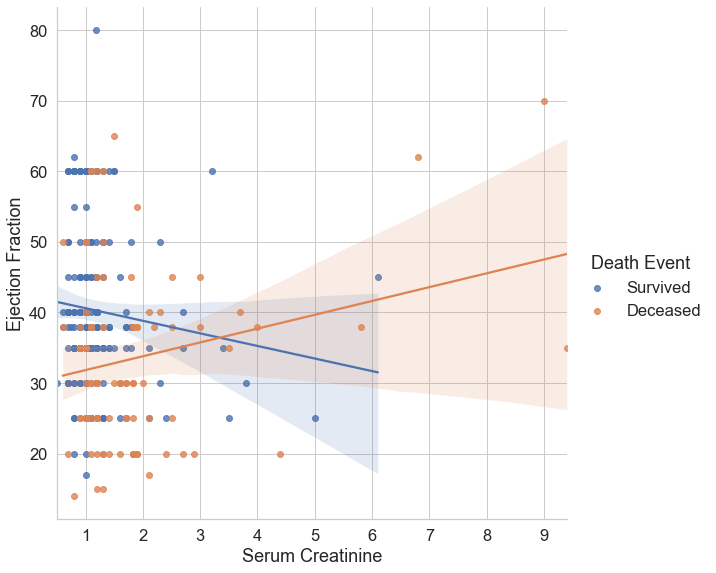

In [30]:
g = sns.lmplot(x='serum_creatinine', y='ejection_fraction', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Serum Creatinine', 'Ejection Fraction')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### j. Correlation between serum creatinine and age

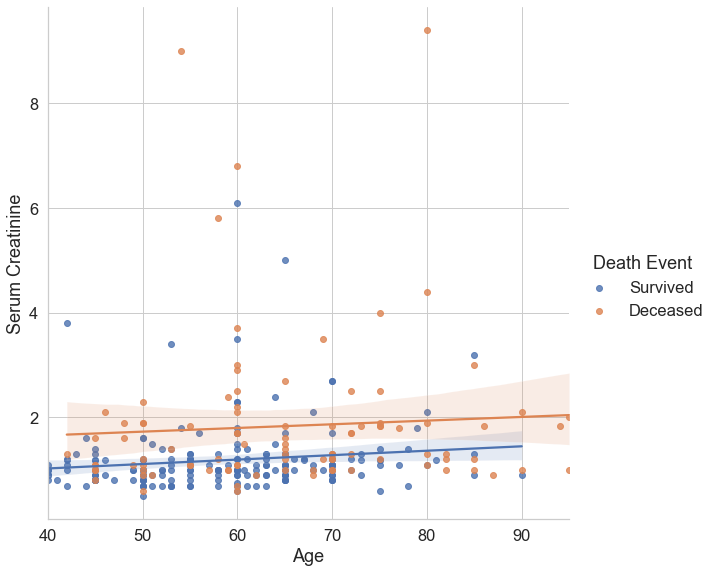

In [31]:
g = sns.lmplot(x='age', y='serum_creatinine', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Age', 'Serum Creatinine')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# 5. Making a linear regression model between Serum Sodium and Ejection Fraction
### a. Predicting Ejection Fraction based on Serum Sodium

#### -- i. Subset data into X and y data

In [32]:
# Subsetting our data- we are going to try to use serum sodium to predict ejection fraction
X_data = heart_data[['serum_sodium']]
y_data = heart_data[['ejection_fraction']]

#### -- ii. Create train and test split sets, test set 33%

In [33]:
# Train and test split, test size 33%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

#### -- iii. Verify our data shapes

In [34]:
# Check the shape of our data sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 1) (200, 1)
(99, 1) (99, 1)


#### -- iv. Instantiate linear regression model and fit to data

In [35]:
rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

#### -- v. Use model to make predictions

In [36]:
# Use the model to make predictions
y_pred = rModel.predict(X_test)

#### -- vi. Calculate R Squared value and other metrics

In [37]:
# Evaluate the model by looking at the R-Squared coefficient
print('R^2:', rModel.score(X_train, y_train))
print('This low score shows that our model explains very little of the variability of the response data.\n')
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('The high score indicates a poor fit for our linear regression model.\n')
print('Root Mean Squared Error:', np.sqrt(mse))
print('The high score indicates a poor fit for our linear regression model.\n')
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('The high score indicates a poor fit for our linear regression model.\n')

R^2: 0.04248972632402426
This low score shows that our model explains very little of the variability of the response data.

Mean Squared Error: 146.38861491958937
The high score indicates a poor fit for our linear regression model.

Root Mean Squared Error: 12.09911628672067
The high score indicates a poor fit for our linear regression model.

Mean Absolute Error: 9.640673005806068
The high score indicates a poor fit for our linear regression model.



#### -- vii. Create dataframe of acutal values and predicted values

In [38]:
y_results = y_test
y_results['Pred EF'] = y_pred

<ipython-input-38-12fb0788e399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_results['Pred EF'] = y_pred


#### -- Viii. Print sample of results data frame

In [39]:
y_results.sample(5)

ejection_fraction    Pred EF
151                 60  40.184048
196                 38  39.001879
114                 40  32.499955
220                 20  37.228627
262                 25  34.273207

#### -- ix. Plot acutal versus predicted ejection fraction

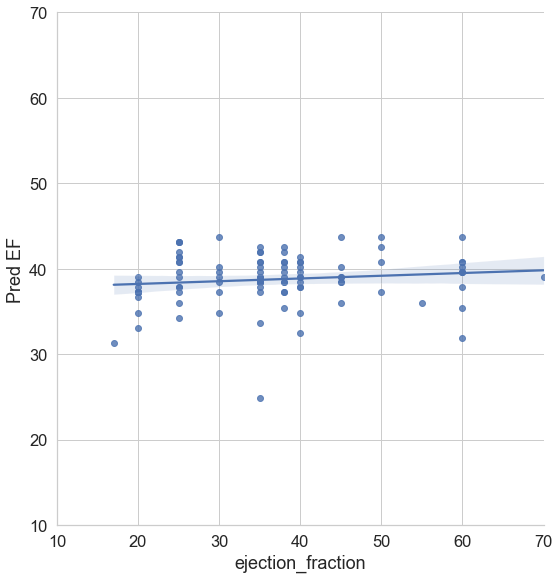

In [40]:
# Plot the predictions agains the actual data

g = sns.lmplot(x='ejection_fraction', y='Pred EF', data=y_results, height=8, aspect=1);
g.set(ylim=(10,70), xlim=(10,70))

#### -- x. Will cross validation improve our results

In [41]:
cv_5 = cross_val_score(rModel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(cv_5)

[-156.19777305 -149.508312   -119.22843197 -143.43029606  -98.73284236]


Our previous MSE was 140, so we see very little improvement in only 2 of the tests.

In [42]:
cv_10 = cross_val_score(rModel, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(cv_10)

[-200.26131505 -121.52485677 -208.52324027  -84.71990729 -110.56747538
 -127.10135615 -134.53072466 -168.36339876  -91.54455099 -106.5833452 ]


Once again the majority of the scores are worse.  
  
These does not seem to be a correlation between ejection fraction and sodium serum.

# 6. Modeling

## a. Model 1: Decision Tree Entropy model - no max_depth

#### -- i. Subset data

In [43]:
# Separate X and y
X = heart_data.drop(['time', 'DEATH_EVENT'], axis='columns')
y = heart_data[['DEATH_EVENT']]

#### -- ii. Create train test split

In [44]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### -- iii. Instantiate decision tree entropy model

In [45]:
# Instantiate decision tree with entropy model
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### -- iv. Use model to make presictions

In [46]:
# Call predict()
y_pred = entropy_model.predict(X_test)
y_pred = pd.Series(y_pred)

#### -- v. Visualize decision tree

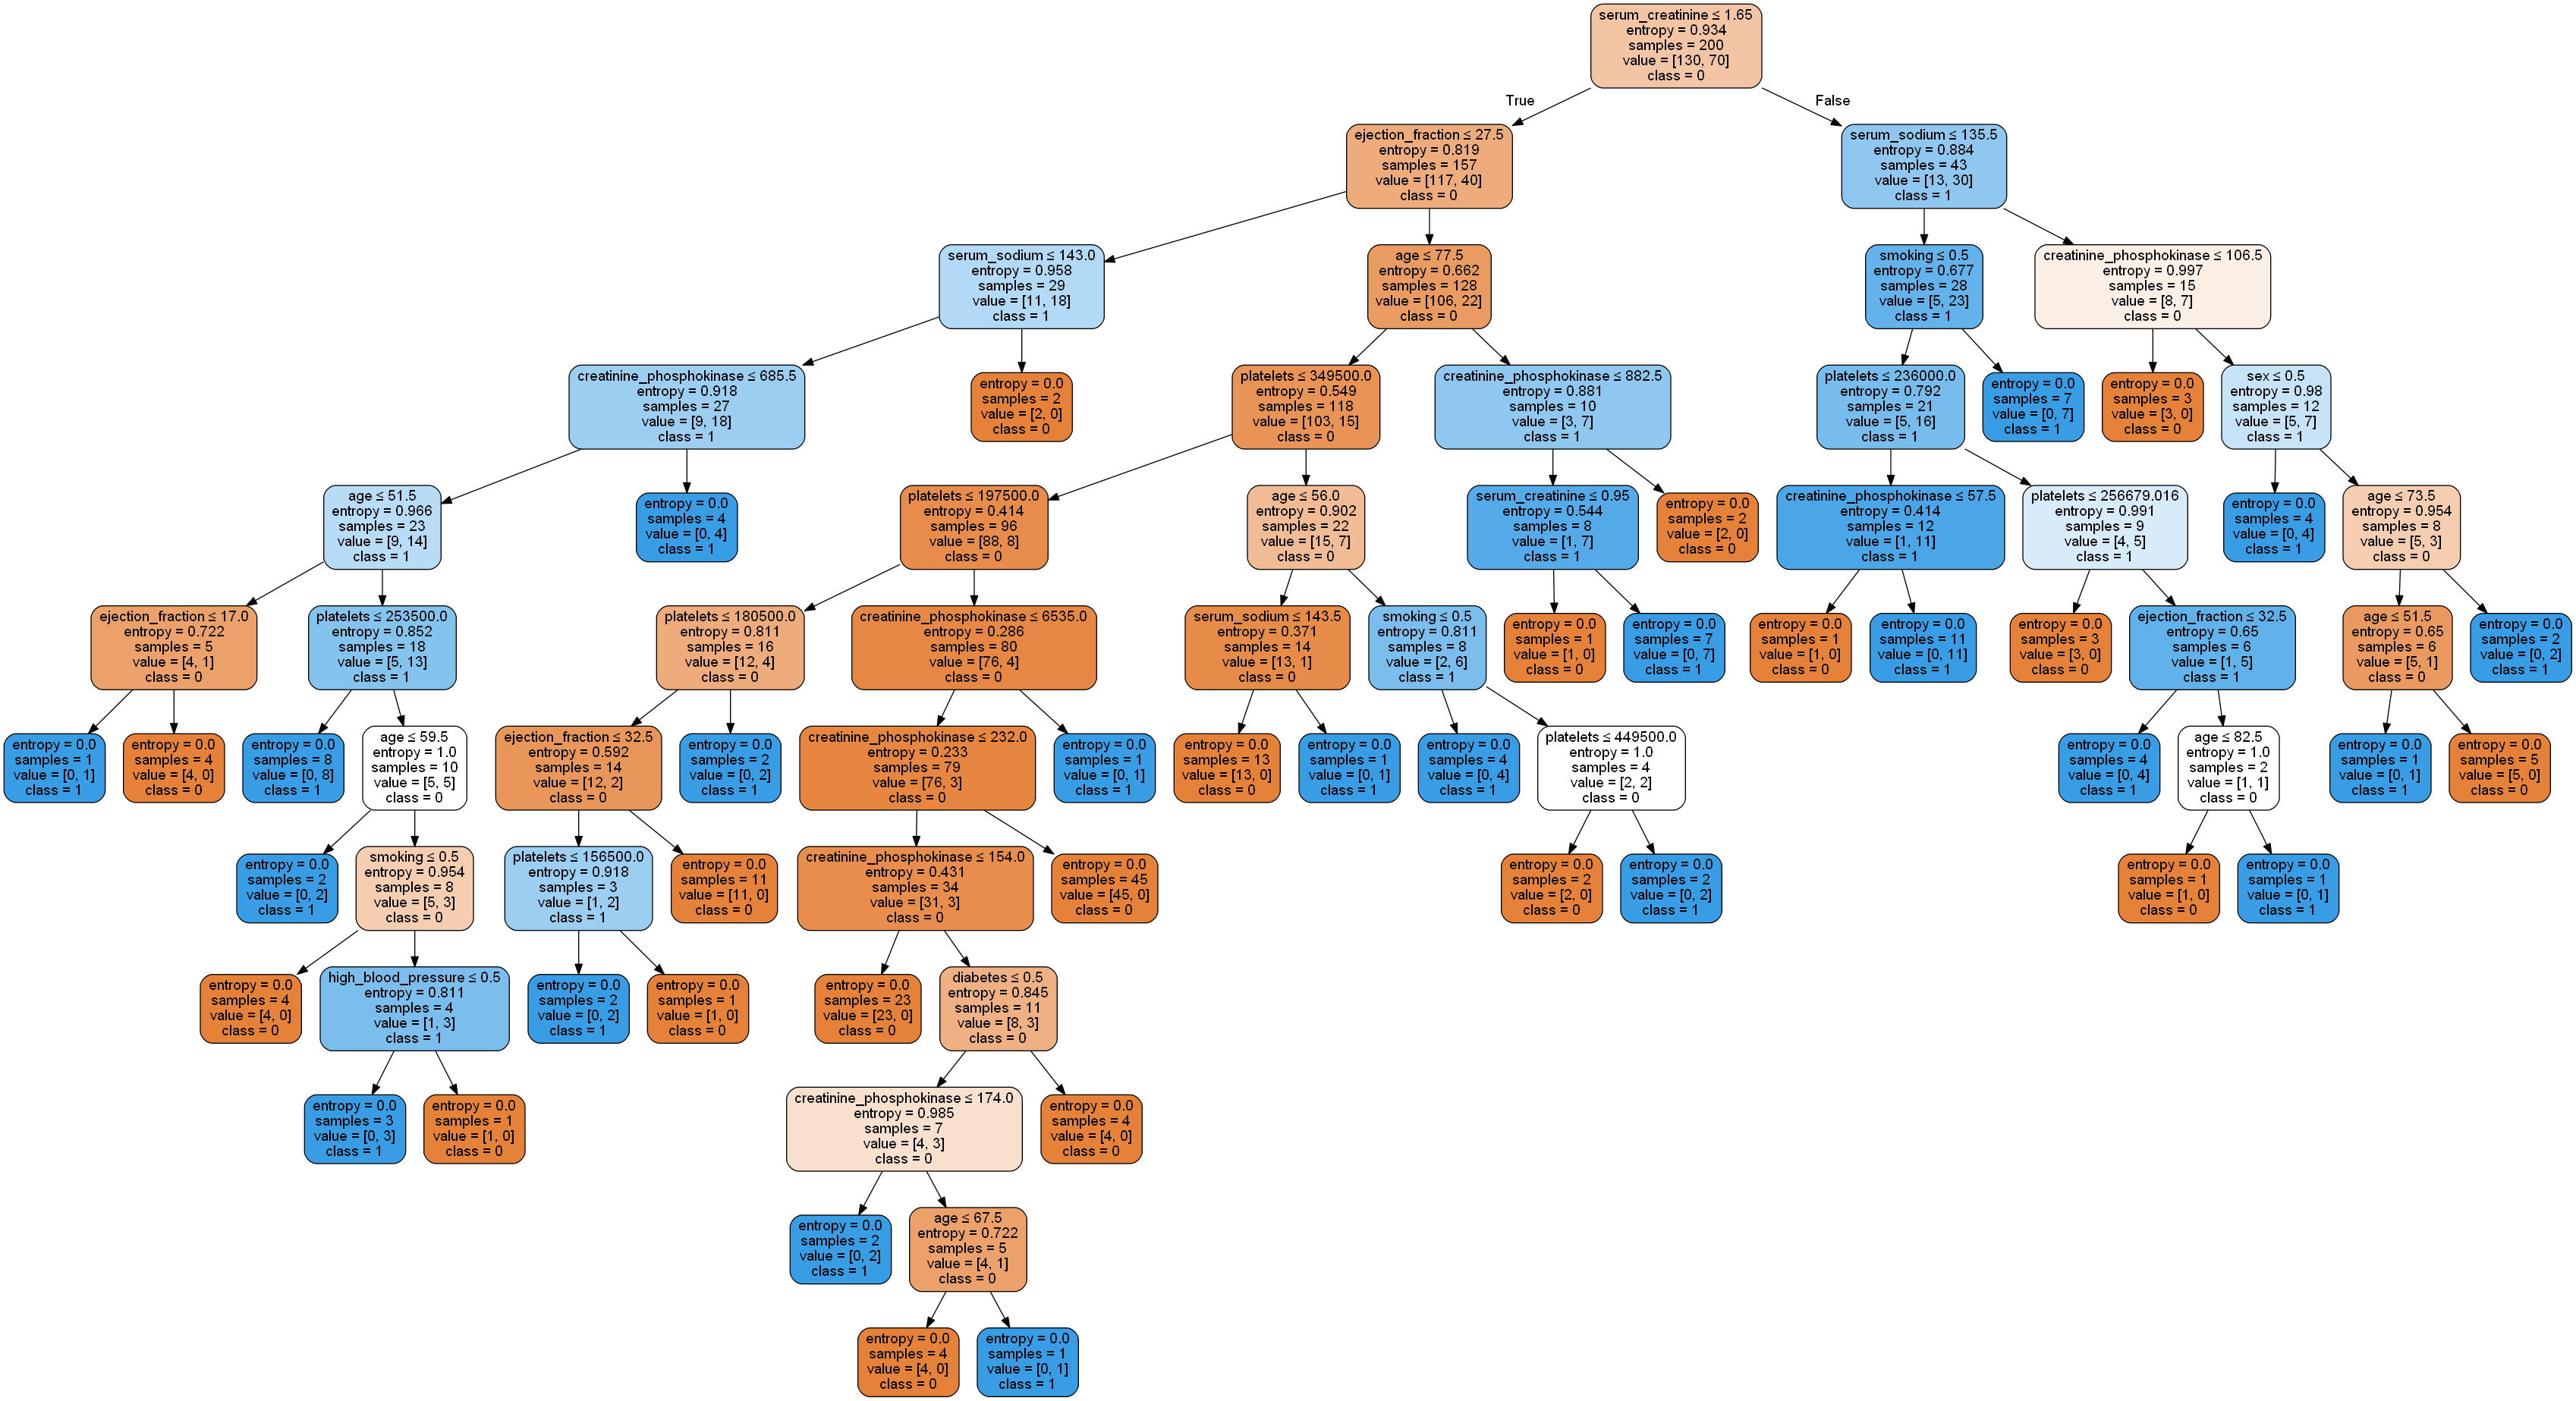

In [47]:
# Visualize the tree
dot_data = StringIO()

tree.export_graphviz(entropy_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ['0', '1']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### -- vi. Model evaluation metrics

In [48]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
F1 Score: 0.4912280701754386
Accuracy: 0.7070707070707071
Balanced accuracy: 0.6527924130663856
Precision score for "Yes" 0.45161290322580644
Precision score for "No" 0.45161290322580644
Recall score for "Yes" 0.5384615384615384
Recall score for "No" 0.5384615384615384


In [159]:
sns.set_style('white')
disp = plot_confusion_matrix(entropy_model, X_test, y_test, normalize='true', cmap=plt.cm.Reds)
Image(filename='ConfusionMatrix.jpg', width='300')

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

## b. Model 2: Decision tree gini model

#### -- i. Instantiate decision tree model

In [50]:
# Instantiate the tree wiht the Gini model
gini_model = DecisionTreeClassifier(criterion='gini')

# Call fit()
gini_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### -- ii. Use model to make predictions

In [51]:
# Call predict()
y_pred = gini_model.predict(X_test) 
y_pred = pd.Series(y_pred)

#### -- iii. Visualize decison tree

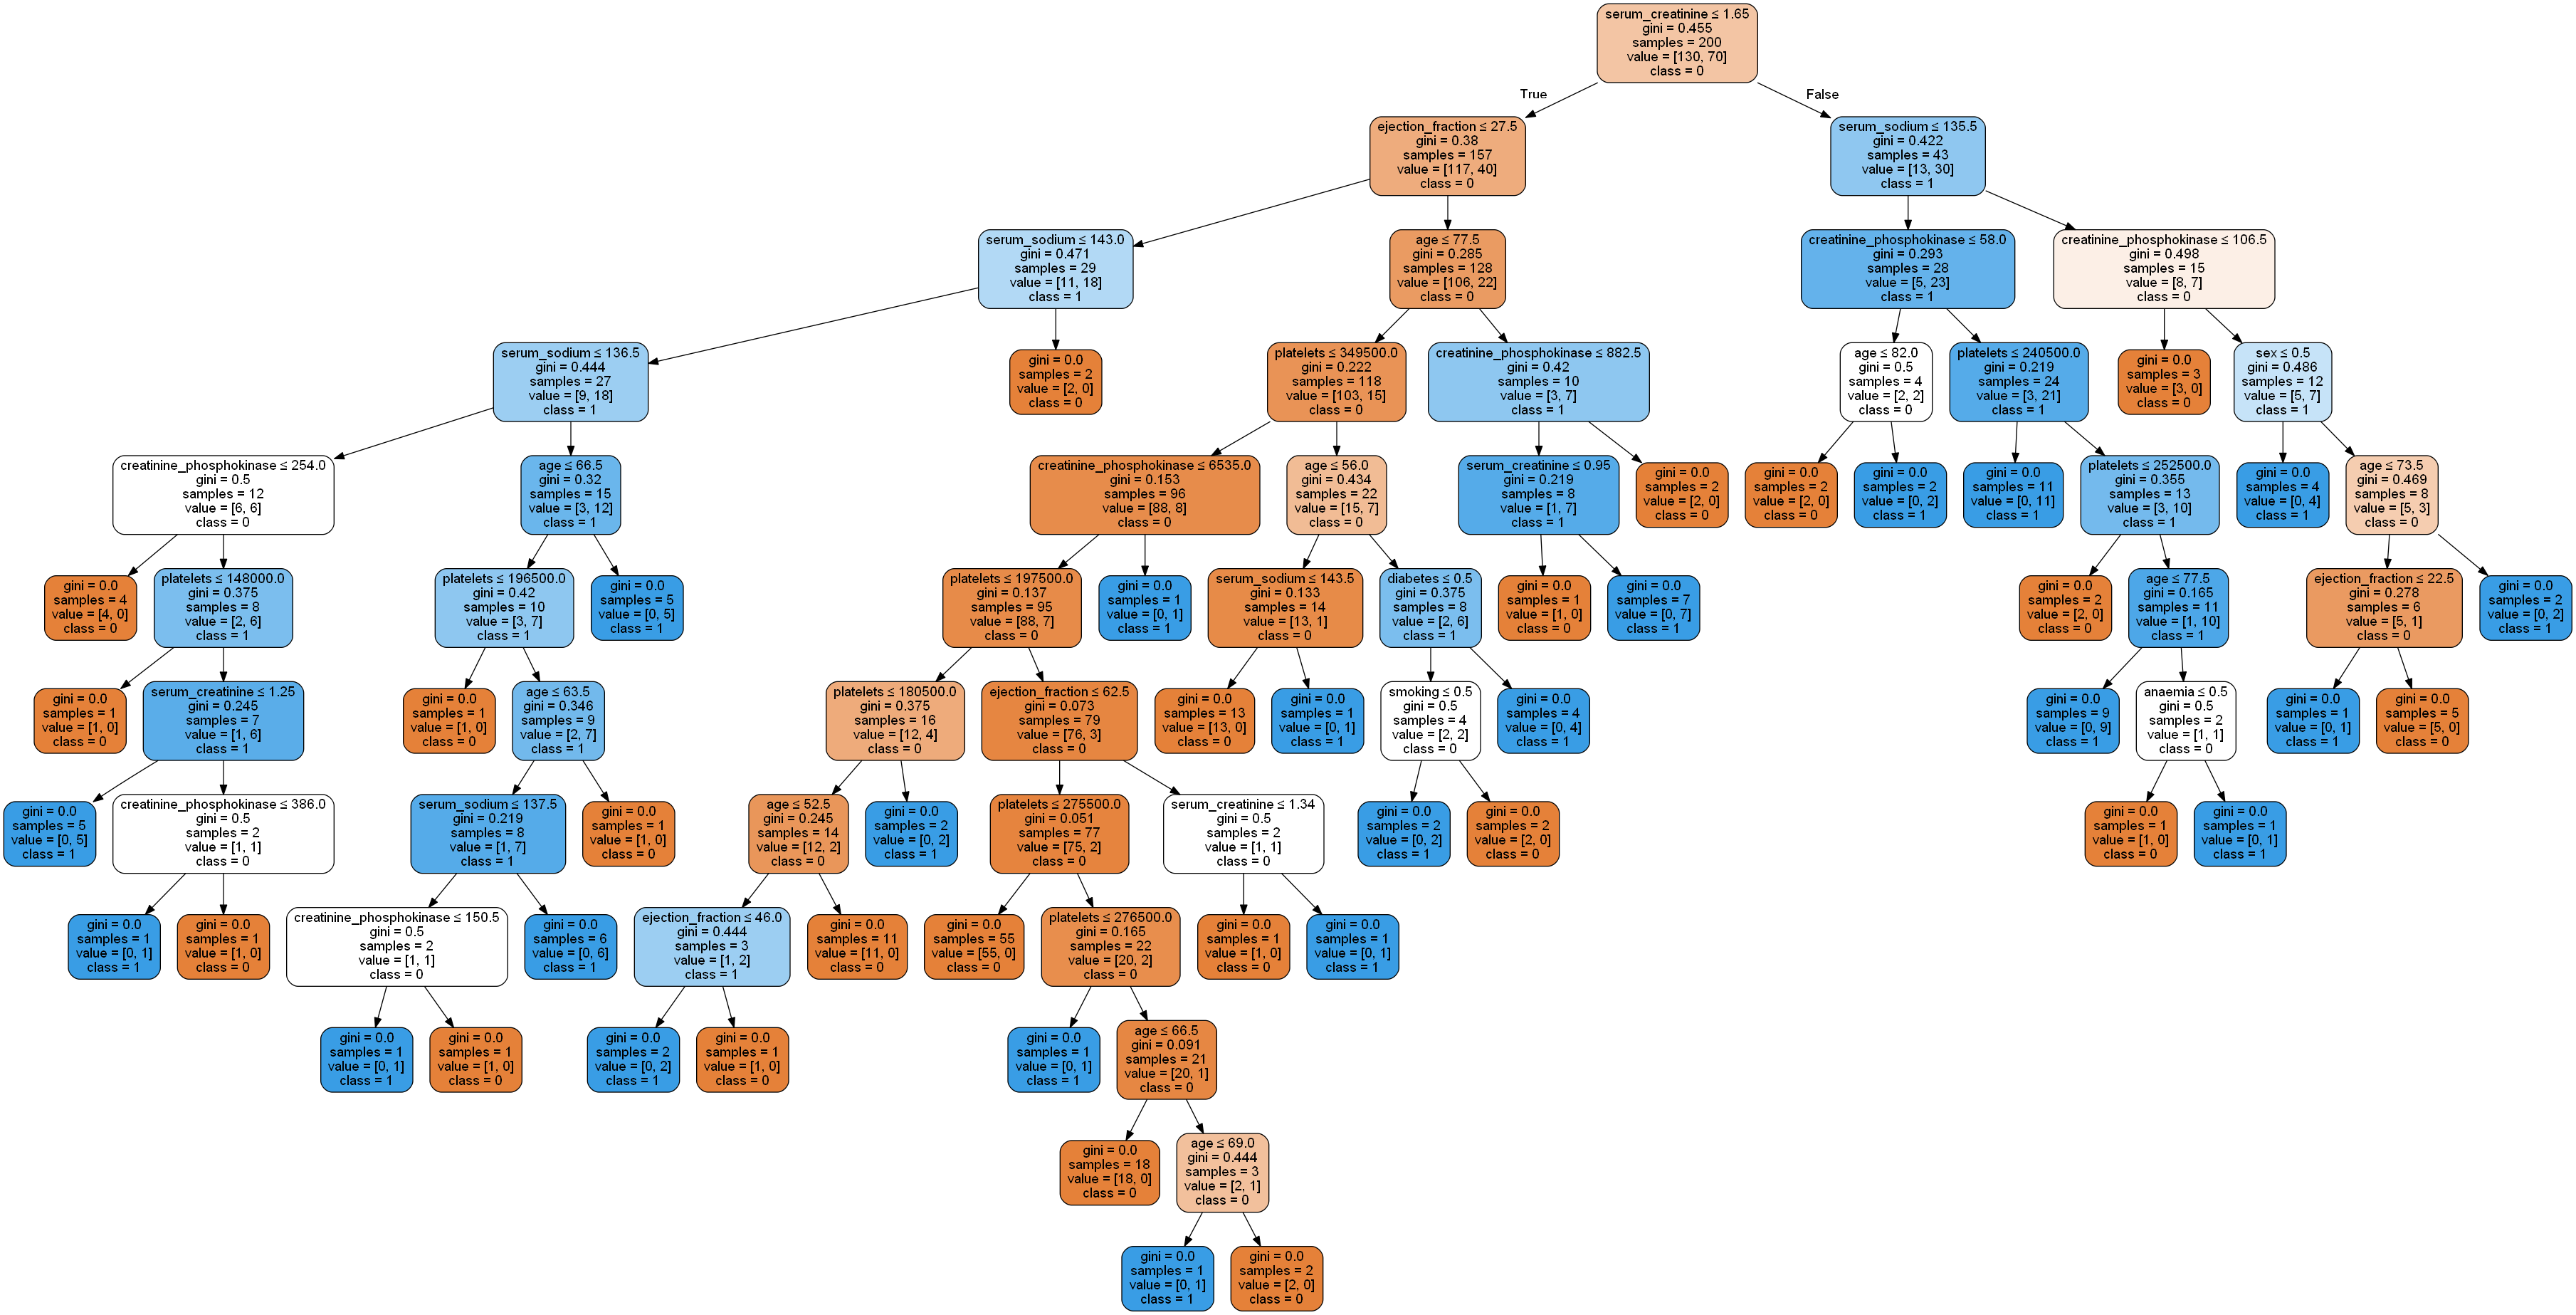

In [52]:
# Visualize the tree
dot_data = StringIO()

tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ['0', '1']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### -- iv. Model evaluation metrics

In [53]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.6666666666666666
Balanced accuracy: 0.5882507903055848
Precision score for "Yes" 0.3793103448275862
Precision score for "No" 0.3793103448275862
Recall score for "Yes" 0.4230769230769231
Recall score for "No" 0.4230769230769231


#### -- v. Conclusion

Our models are not performing well.  
  
We'll try a model with less features.

## c. Model 3: Entropoy model with less features

#### -- i. Evaluating the features based on covariance

#### Looking back at our covariance matrix, the only features with much covariance at all are:  
  
Age: 0.255  
Ejection Fraction: 0.270  
Serum Creatinine: 0.295  
Serum Sodium: 0.196  


#### -- ii. Subset data

In [54]:
# Separate X and y
X = heart_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = heart_data[['DEATH_EVENT']]

#### -- iii. Create train test split

In [55]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### -- iv. Instantiate decision tee entropy model

In [56]:
# Instantiate decision tree with entropy model
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### -- v. Use model to make predictions

In [57]:
# Call predict()
y_pred = entropy_model.predict(X_test)
y_pred = pd.Series(y_pred)

#### -- vi. Visualize decision tree

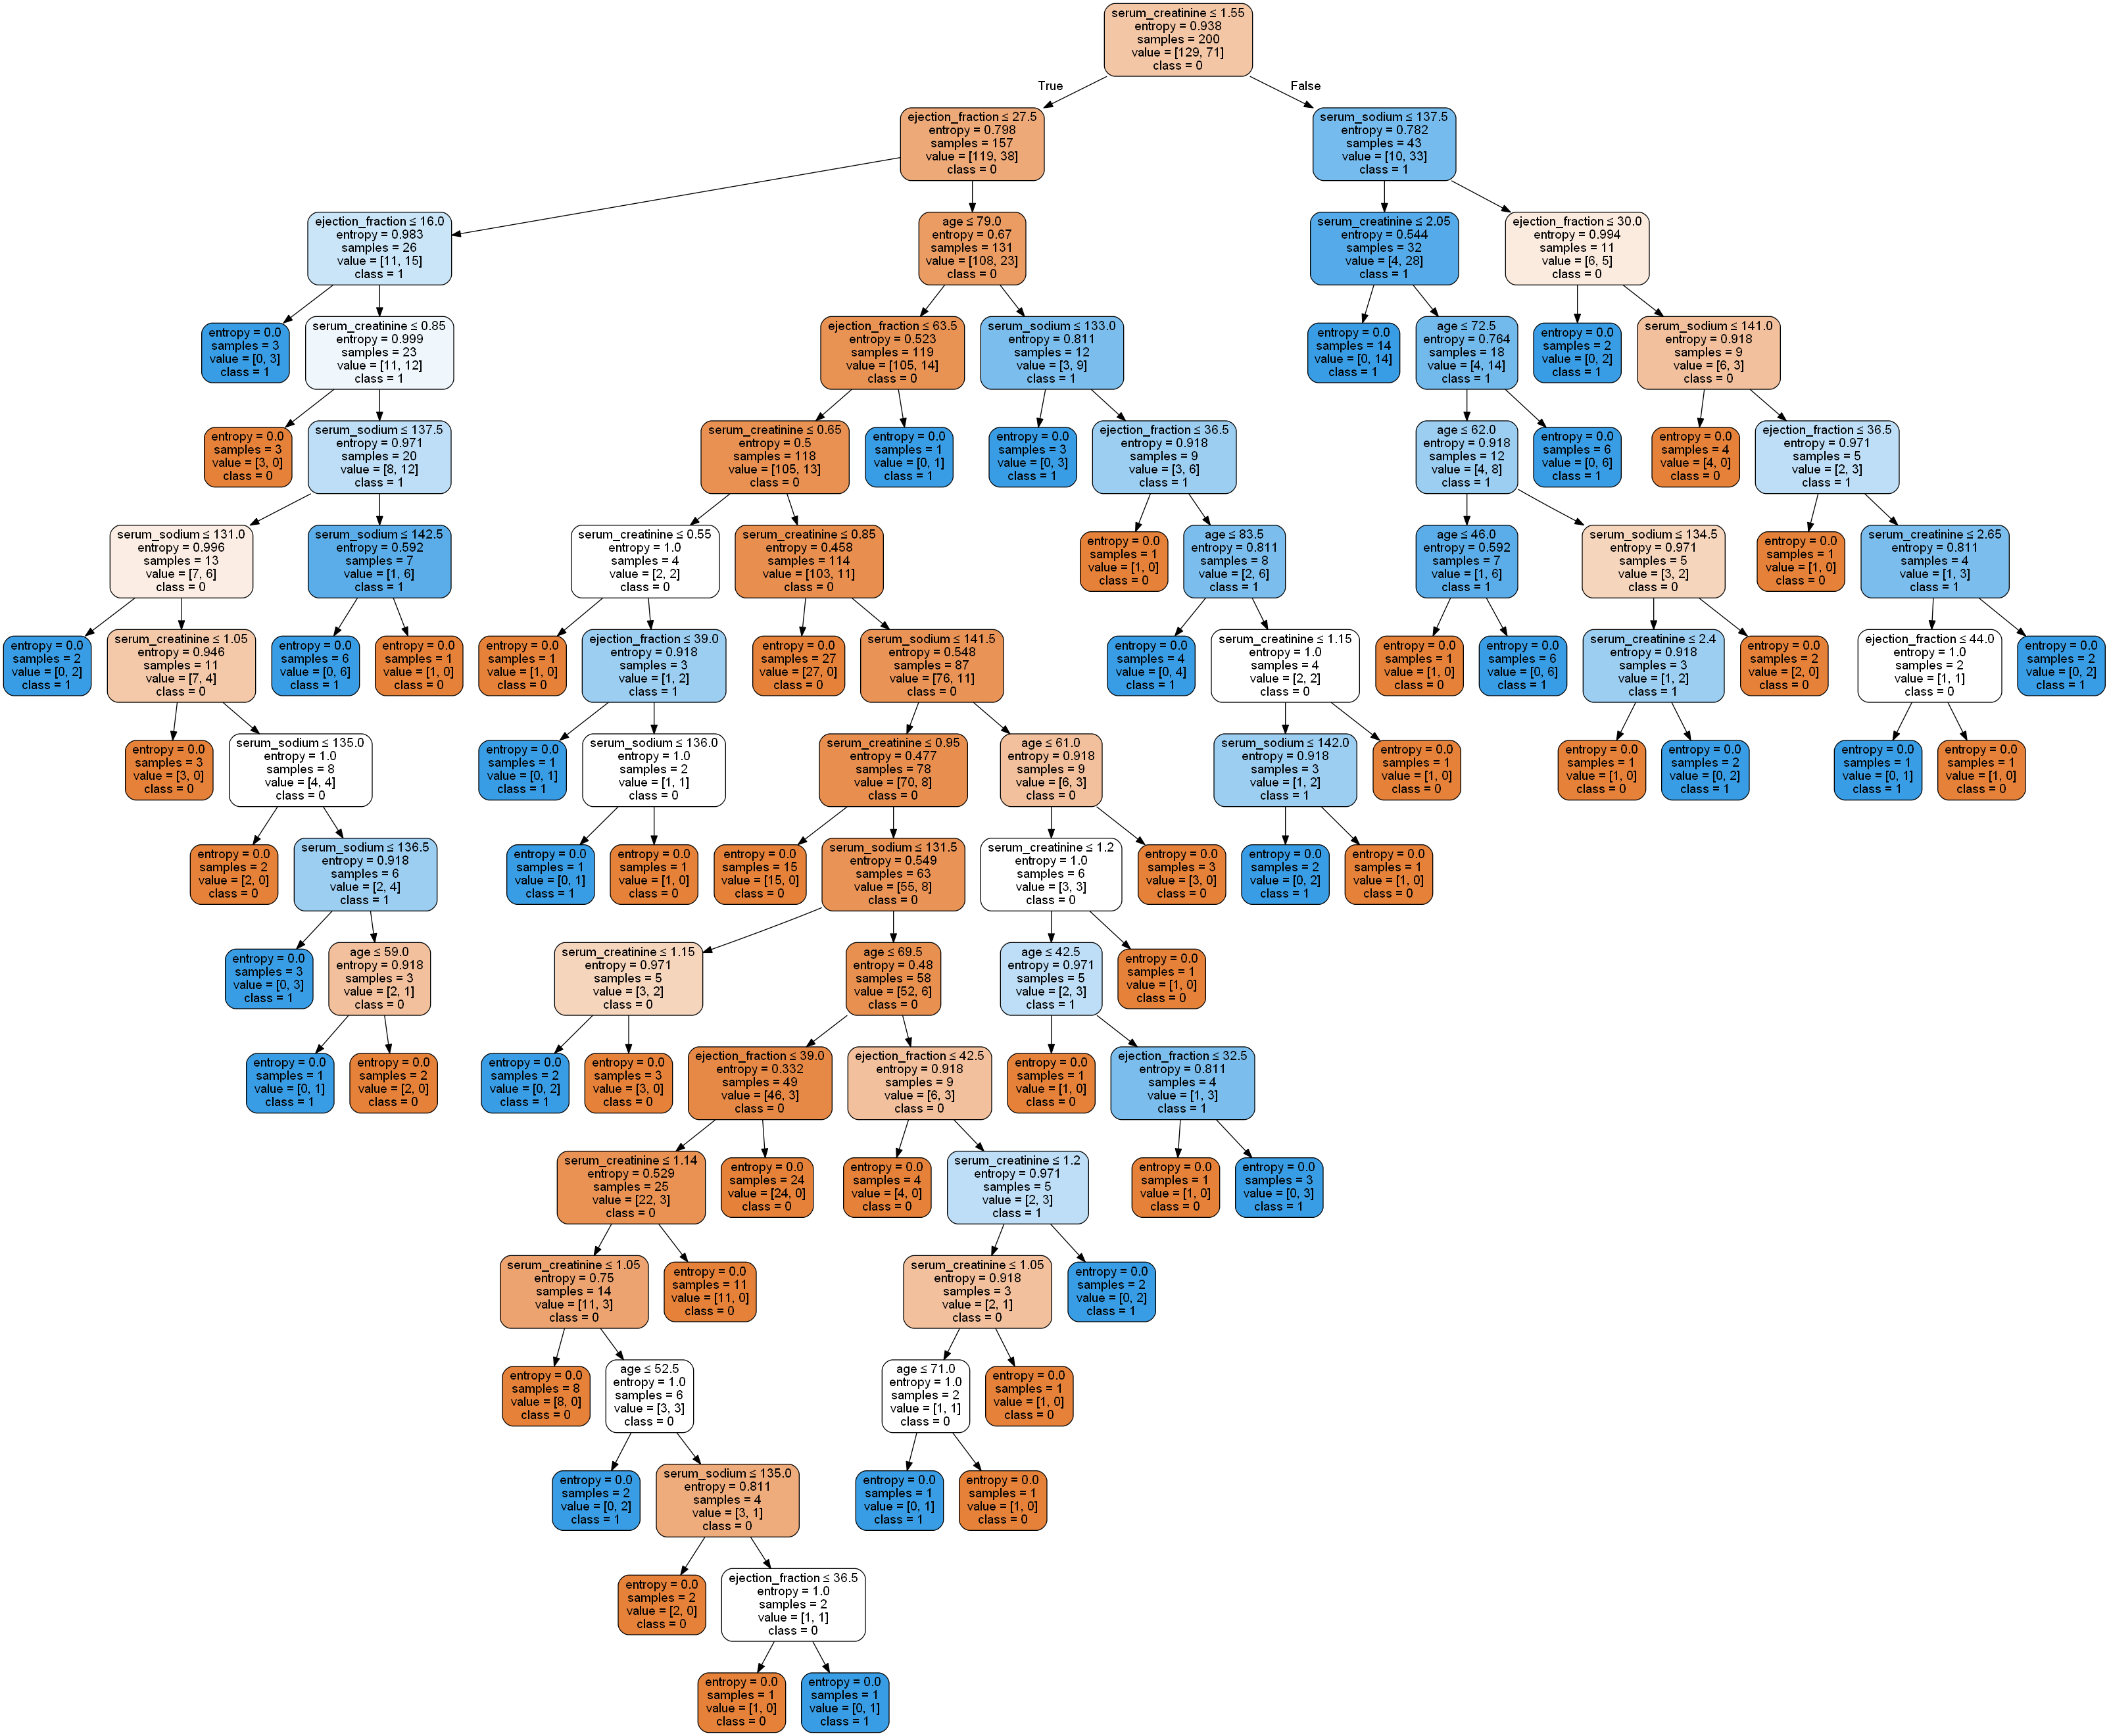

In [58]:
# Visualize the tree
dot_data = StringIO()

tree.export_graphviz(entropy_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ['0', '1']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### -- vii. Model evaluation metrics

In [59]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.6666666666666666
Balanced accuracy: 0.6313513513513513
Precision score for "Yes" 0.3888888888888889
Precision score for "No" 0.3888888888888889
Recall score for "Yes" 0.56
Recall score for "No" 0.56


#### -- viii. Plot confusion matrix

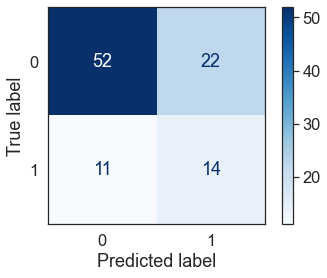

In [60]:
sns.set_style('white')
disp = plot_confusion_matrix(entropy_model, X_test, y_test, cmap=plt.cm.Blues)

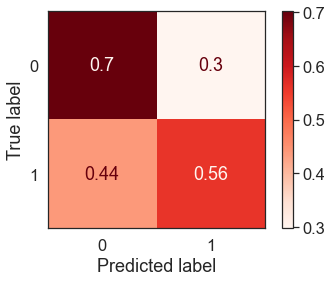

In [61]:
disp = plot_confusion_matrix(entropy_model, X_test, y_test, normalize='true', cmap=plt.cm.Reds)

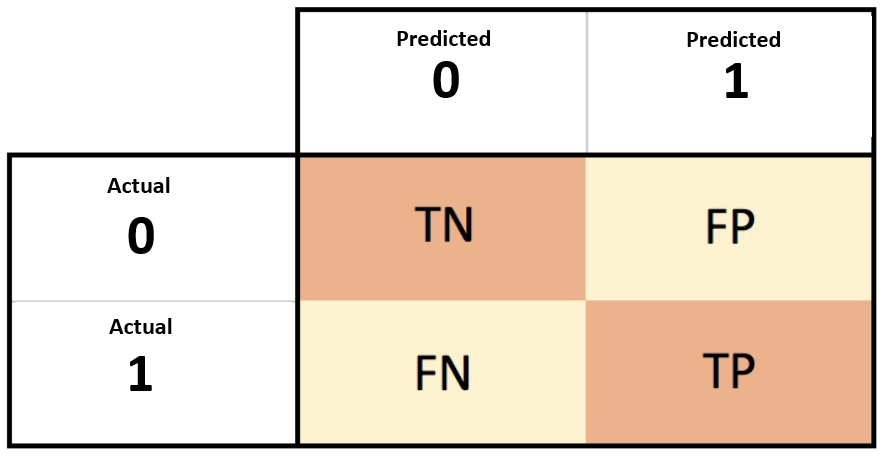

In [62]:
Image(filename='ConfusionMatrix.jpg', width='500')

#### -- ix. Calculate and plot ROC

In [63]:
ras = roc_auc_score(y_test, y_pred)
print('ROC area under the curve:', ras)

ROC area under the curve: 0.6313513513513513


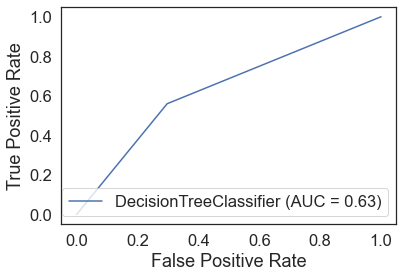

In [64]:
plot_roc_curve(entropy_model, X_test, y_test);

## d. Model 4: Random Forest with 4 prime features

#### --i. Subset data

In [65]:
# Separate X and y
X = heart_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = heart_data['DEATH_EVENT']

#### --ii. Create train test split

In [66]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

#### --iii. Instantiate random forest model

In [67]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

#### --iv. Use model to make predictions

In [68]:
# Apply predict
y_pred = rfc.predict(X_test)

In [69]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.7070707070707071
Balanced accuracy: 0.6893939393939394
Precision score for "Yes" 0.5526315789473685
Precision score for "No" 0.5526315789473685
Recall score for "Yes" 0.6363636363636364
Recall score for "No" 0.6363636363636364


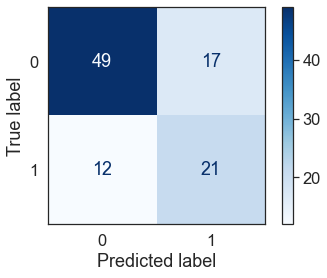

In [70]:
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

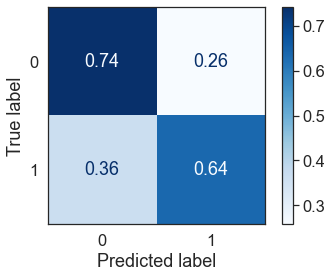

In [71]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

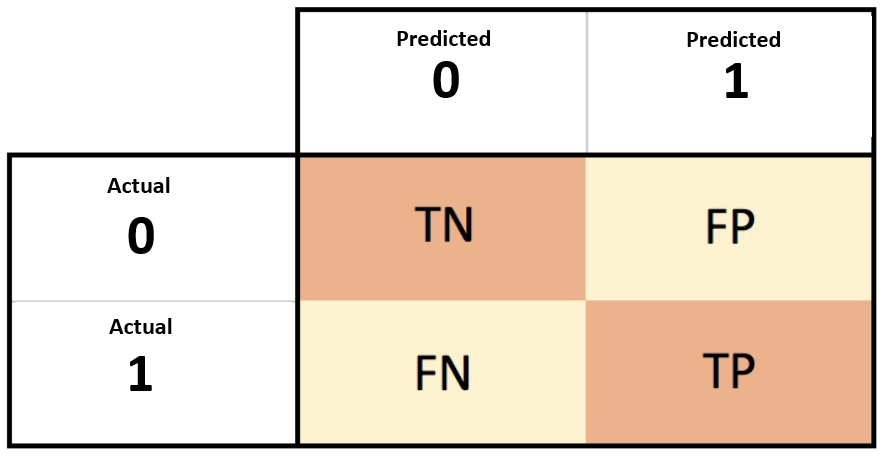

In [72]:
Image(filename='ConfusionMatrix.jpg', width='500')

### i. Correlation between ejection fraction and serum creatinine

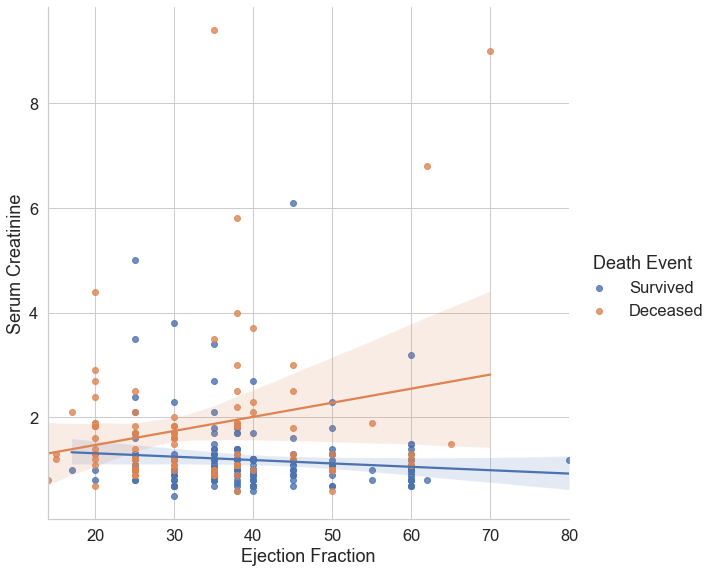

In [73]:
sns.set_style('whitegrid')
g = sns.lmplot(x='ejection_fraction', y='serum_creatinine', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');
g = g.set_axis_labels('Ejection Fraction', 'Serum Creatinine')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#### This is an intersting plot, it clearly shows a correlation between Serum Craatinine and Death Event, regardless of Ejection Fraction

# Random Forest  
## Less Features - Ejection Fraction and Serum Creatinine only

In [74]:
# Separate X and y
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [75]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [76]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [77]:
# Apply predict
y_pred = rfc.predict(X_test)

In [78]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.7676767676767676
Balanced accuracy: 0.7202898550724637
Precision score for "Yes" 0.6206896551724138
Precision score for "No" 0.6206896551724138
Recall score for "Yes" 0.6
Recall score for "No" 0.6


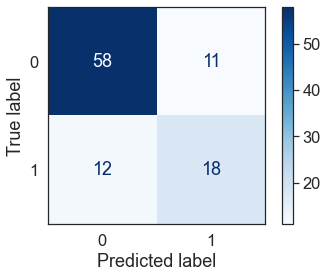

In [79]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

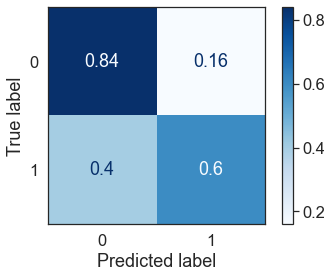

In [80]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

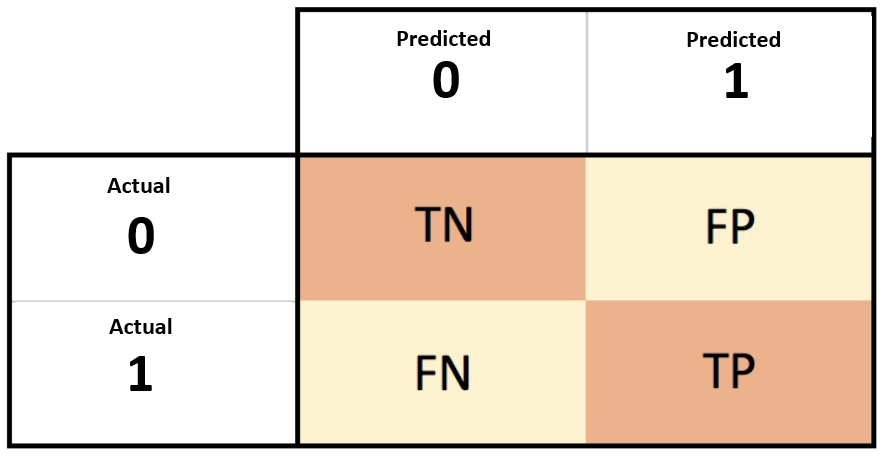

In [81]:
Image(filename='ConfusionMatrix.jpg', width='500')

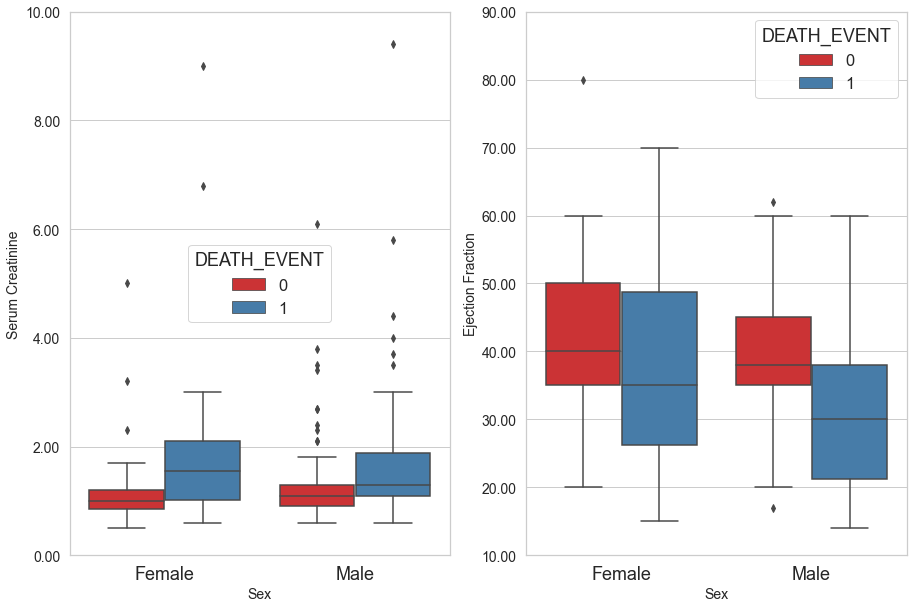

In [82]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))


# Create a violin plot and a box plot of our variable
v = sns.boxplot(ax=axes[0], x='sex', y='serum_creatinine', hue='DEATH_EVENT', data=heart_data, palette='Set1')
b = sns.boxplot(ax=axes[1], x='sex', y='ejection_fraction', hue='DEATH_EVENT', data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel('Serum Creatinine', fontsize=14)
v.set_xlabel('Sex', fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel('Ejection Fraction', fontsize=14)
b.set_xlabel('Sex', fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

# Random Forest  
## Less Features - Ejection Fraction and Serum Creatinine only  
## Scaled Features

In [83]:
# Separate X and y
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [84]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_test_scaled.mean()

0.1728919669475692

In [87]:
X_test_scaled.std()

1.3195614381150365

In [88]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [89]:
# Apply predict
y_pred = rfc.predict(X_test_scaled)

In [90]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.7373737373737373
Balanced accuracy: 0.7348484848484849
Precision score for "Yes" 0.5853658536585366
Precision score for "No" 0.5853658536585366
Recall score for "Yes" 0.7272727272727273
Recall score for "No" 0.7272727272727273


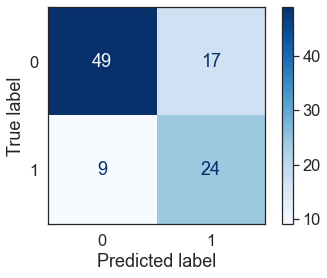

In [91]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues)

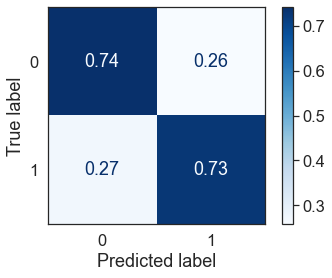

In [92]:
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues)

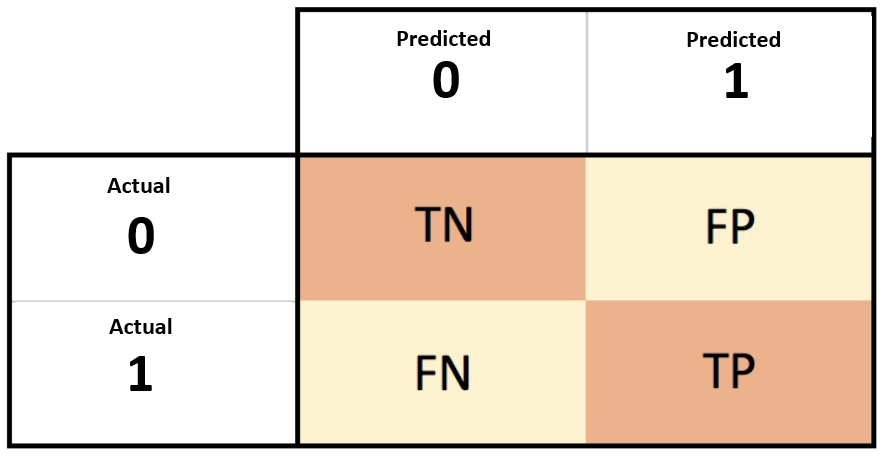

In [93]:
Image(filename='ConfusionMatrix.jpg', width='500')

# PCA  of all 12 features

We're going to apply PCA to try to determine how  many features we should be looking at.

In [94]:
from sklearn.decomposition import PCA

# Create matrix
x_cols = heart_data.drop('DEATH_EVENT', axis=1)
x_cols.shape

(299, 12)

In [95]:
x_pca = PCA(n_components=12, random_state=10).fit(x_cols)

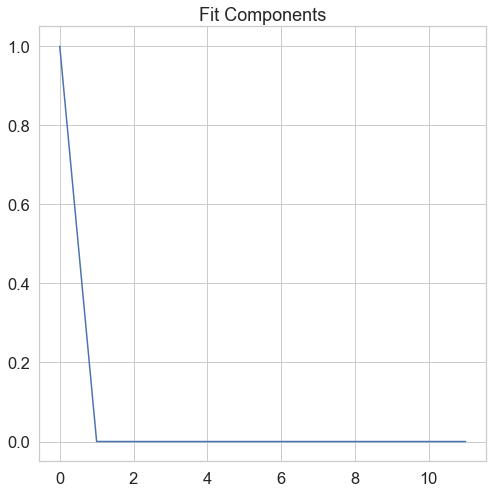

In [96]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
plt.title('Fit Components')
plt.plot(x_pca.explained_variance_ratio_);

# Random Forest with only 3 features
## Features scaled

In [97]:
# Separate X and y
X = heart_data[['ejection_fraction', 'serum_creatinine', 'time']]
y = heart_data['DEATH_EVENT']

In [98]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
X_test_scaled.mean()

0.1255924256337007

In [101]:
X_test_scaled.std()

1.213179388254497

In [102]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [103]:
# Apply predict
y_pred = rfc.predict(X_test_scaled)

In [104]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.8484848484848485
Balanced accuracy: 0.8257575757575757
Precision score for "Yes" 0.78125
Precision score for "No" 0.78125
Recall score for "Yes" 0.7575757575757576
Recall score for "No" 0.7575757575757576


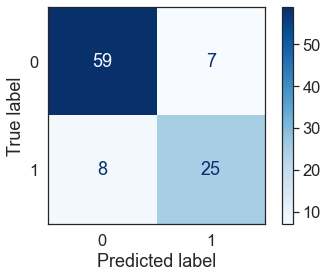

In [105]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues)

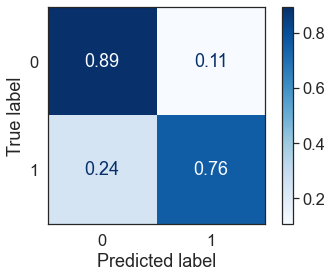

In [106]:
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues)

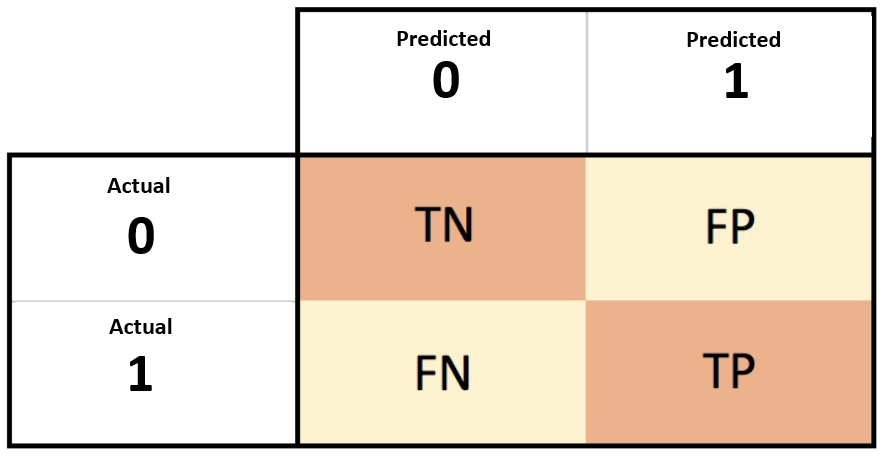

In [107]:
Image(filename='ConfusionMatrix.jpg', width='500')

## Investigate the correlation between the follow up time and death event

In [108]:
timedf = heart_data[['time', 'DEATH_EVENT']]
# timedf = timedf[timedf.DEATH_EVENT != 0]
# timedf.DEATH_EVENT.value_counts()

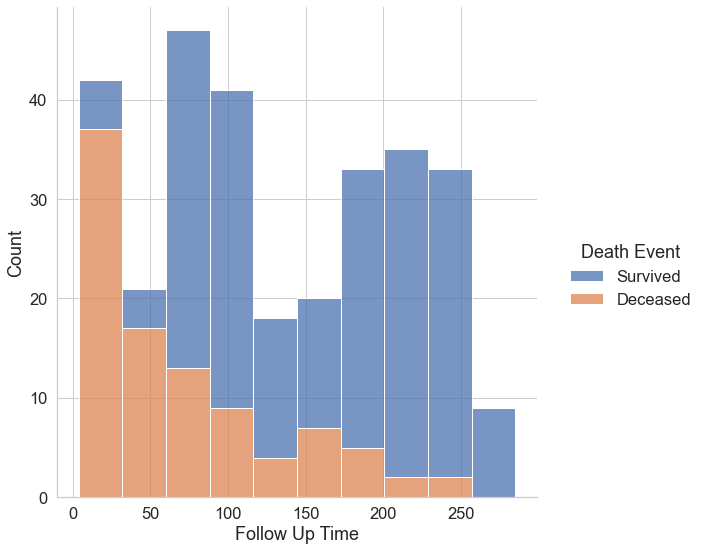

In [109]:
sns.set_style('whitegrid')
g = sns.displot(timedf, x='time', hue='DEATH_EVENT', multiple='stack', height=8);
g = g.set_axis_labels('Follow Up Time')

# title
new_title = 'Death Event'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Survived', 'Deceased']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

#### Perhaps we should run a model with time as the target

# Recursive Feature Selection

In [110]:
X = heart_data.drop('DEATH_EVENT', axis=1)
X1 = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']

In [111]:
X = scaler.fit_transform(X)

for i in range(1,9):    
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=i )
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X1.loc[:, rfe_support].columns.tolist()
    print(len(rfe_feature), rfe_feature)

1 ['time']
2 ['ejection_fraction', 'time']
3 ['ejection_fraction', 'serum_creatinine', 'time']
4 ['age', 'ejection_fraction', 'serum_creatinine', 'time']
5 ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
6 ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']
7 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']
8 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time']


# Random Forest 4 prime features
## Scaled Data

In [112]:
# Separate X and y
X = heart_data[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
y = heart_data['DEATH_EVENT']

In [113]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_test_scaled.mean()

0.0955144674116092

In [116]:
X_test_scaled.std()

1.1711747257342948

In [117]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [118]:
# Apply predict
y_pred = rfc.predict(X_test_scaled)

In [119]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.797979797979798
Balanced accuracy: 0.7651515151515151
Precision score for "Yes" 0.7096774193548387
Precision score for "No" 0.7096774193548387
Recall score for "Yes" 0.6666666666666666
Recall score for "No" 0.6666666666666666


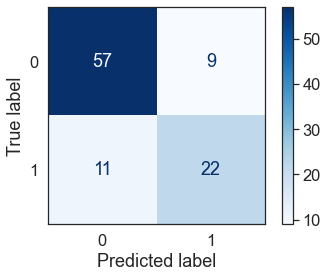

In [120]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues)

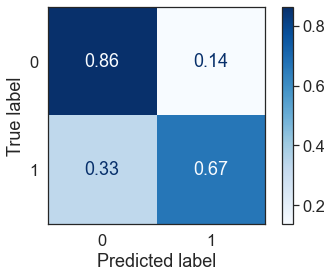

In [121]:
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues)

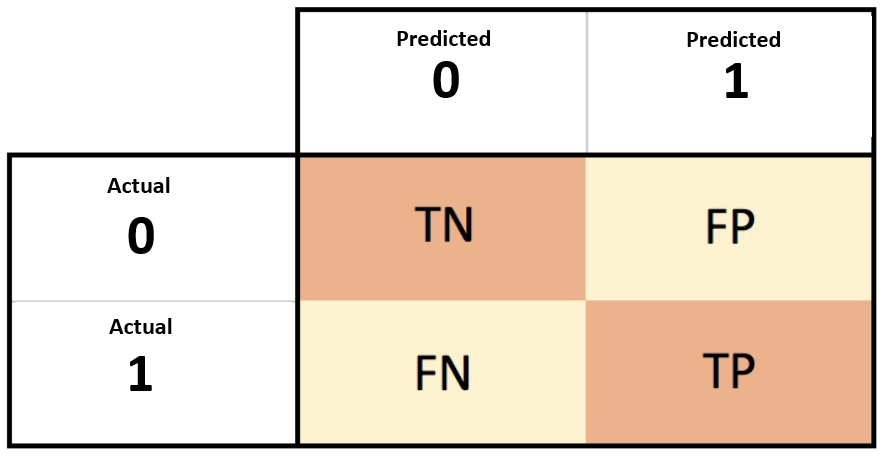

In [122]:
Image(filename='ConfusionMatrix.jpg', width='500')

## Cross Validation Hyperparameter Tuning  
### All Features

In [123]:
X = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']

In [124]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [125]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [126]:
# Instantiate RFC
rfc = RandomForestClassifier(random_state=10)

# Propagate RSCV
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, 
                                 n_iter=100, cv=4, verbose=2, random_state=10, n_jobs=-1)

# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [127]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

## Test run

In [128]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=2,
                             max_features='sqrt', max_depth=50, bootstrap=True, random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200, random_state=10)

In [129]:
# Apply predict
y_pred = rfc.predict(X_test)

In [130]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.8383838383838383
Balanced accuracy: 0.803030303030303
Precision score for "Yes" 0.7931034482758621
Precision score for "No" 0.7931034482758621
Recall score for "Yes" 0.696969696969697
Recall score for "No" 0.696969696969697


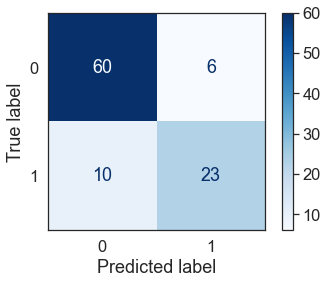

In [131]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

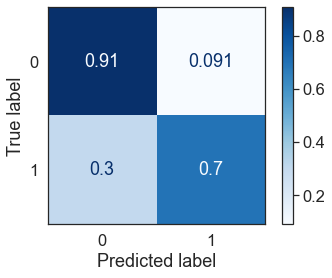

In [132]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

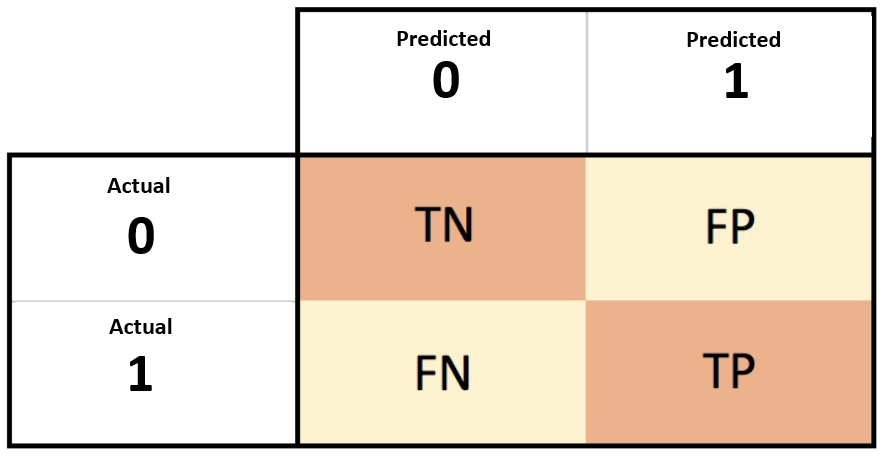

In [133]:
Image(filename='ConfusionMatrix.jpg', width='500')

## Cross Validation Hyperparameter Tuning
### 2 prime features

In [134]:
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [135]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [136]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [137]:
# Instantiate RFC
rfc = RandomForestClassifier(random_state=20)

# Propagate RSCV
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, 
                                 n_iter=100, cv=4, verbose=2, random_state=10, n_jobs=-1)

# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [138]:
rfc_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

## Test run

Instantiate Random Forest Model

In [139]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(n_estimators=1600, min_samples_split=10, min_samples_leaf=4,
                             max_features='sqrt', max_depth=30, bootstrap=True, random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600,
                       random_state=10)

In [140]:
# Apply predict
y_pred = rfc.predict(X_test)

In [141]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.7878787878787878
Balanced accuracy: 0.7803030303030303
Precision score for "Yes" 0.6578947368421053
Precision score for "No" 0.6578947368421053
Recall score for "Yes" 0.7575757575757576
Recall score for "No" 0.7575757575757576


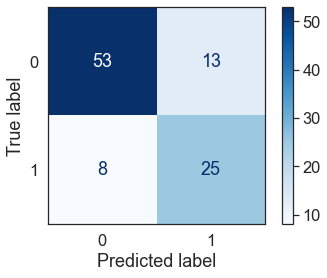

In [142]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

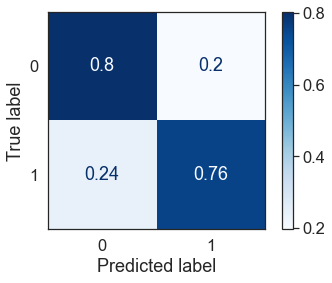

In [143]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

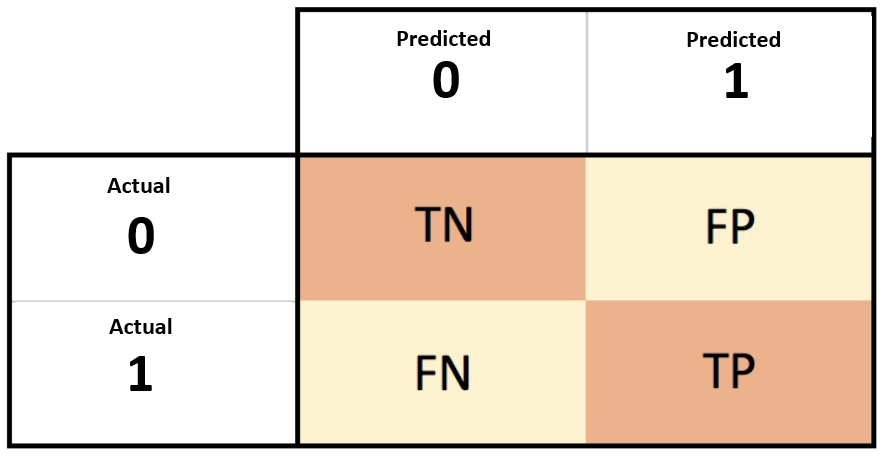

In [144]:
Image(filename='ConfusionMatrix.jpg', width='500')

# Multiple Random Forest Runs for Average

In [145]:
# Import mean function
from statistics import mean

# Pull two prime features
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [146]:
# Number of tests
test = 100

# Empty lists
accuracy = []
balanced_accuracy = []
prec = []
recall = []

for i in range(test):

    # Split the data into test train data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

    # Instantiate random forest and fit
    rfc = RandomForestClassifier(n_estimators=1600, min_samples_split=10, min_samples_leaf=4,
                                 max_features='sqrt', max_depth=30, bootstrap=True)
    rfc.fit(X_train, y_train)

    # Apply predict
    y_pred = rfc.predict(X_test)

    # Model evaluation metrics 

    accuracy.append(accuracy_score(y_test,y_pred))
    balanced_accuracy.append(balanced_accuracy_score(y_test,y_pred))
    
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))

In [147]:
print('Accuracy:', mean(accuracy).round(2))
print('Balanced Accuracy:', mean(balanced_accuracy).round(2))
print('Precision Score:', mean(prec).round(2))
print('Recall Score:', mean(recall).round(2))

Accuracy: 0.77
Balanced Accuracy: 0.71
Precision Score: 0.68
Recall Score: 0.55
